# **Fashion MNIST: Raw Data Analysis**

***
***

### **Import Libraries and Data**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import cv2
import json
from datetime import datetime
from IPython.display import display

2025-04-27 11:04:36.262764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745751876.276147   29479 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745751876.280189   29479 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745751876.291792   29479 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745751876.291807   29479 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745751876.291809   29479 computation_placer.cc:177] computation placer alr

In [2]:
# Create directory for analysis results
os.makedirs('./analysis_results', exist_ok=True)

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


### **1. Dataset Overview**

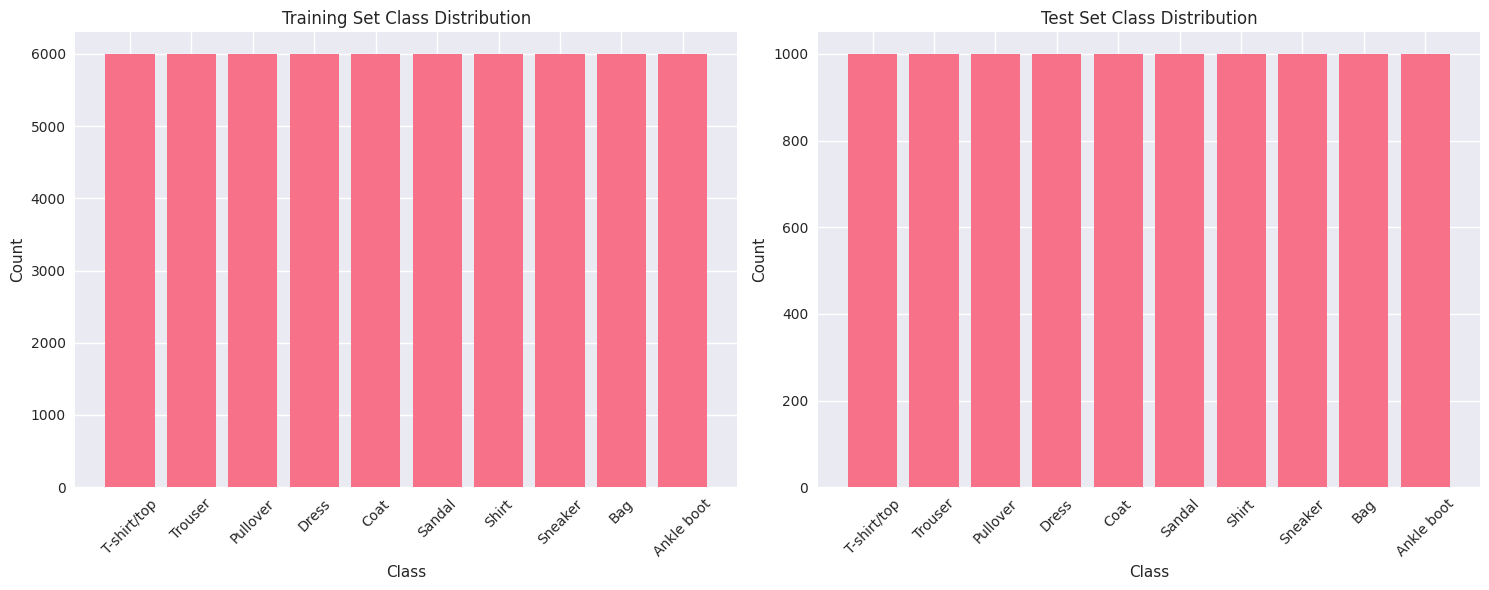


Dataset Overview:
Total training samples: 60000
Total test samples: 10000
Image shape: (28, 28)


In [4]:
# 1. Dataset Overview
def analyze_dataset_overview():
    # Class distribution
    train_dist = np.bincount(y_train)
    test_dist = np.bincount(y_test)
    
    # Create distribution visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1.bar(class_names, train_dist)
    ax1.set_title('Training Set Class Distribution')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)
    
    ax2.bar(class_names, test_dist)
    ax2.set_title('Test Set Class Distribution')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Count')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('./analysis_results/01_class_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Save distribution data
    distribution_data = {
        'train_distribution': dict(zip(class_names, train_dist.tolist())),
        'test_distribution': dict(zip(class_names, test_dist.tolist())),
        'image_shape': X_train[0].shape,
        'total_train_samples': len(X_train),
        'total_test_samples': len(X_test)
    }
    
    with open('./analysis_results/01_dataset_overview.json', 'w') as f:
        json.dump(distribution_data, f, indent=4)
    
    # Display summary in notebook
    print("\nDataset Overview:")
    print(f"Total training samples: {distribution_data['total_train_samples']}")
    print(f"Total test samples: {distribution_data['total_test_samples']}")
    print(f"Image shape: {distribution_data['image_shape']}")
    
    return distribution_data

overview_data = analyze_dataset_overview()

### **2. Statistical Analysis**

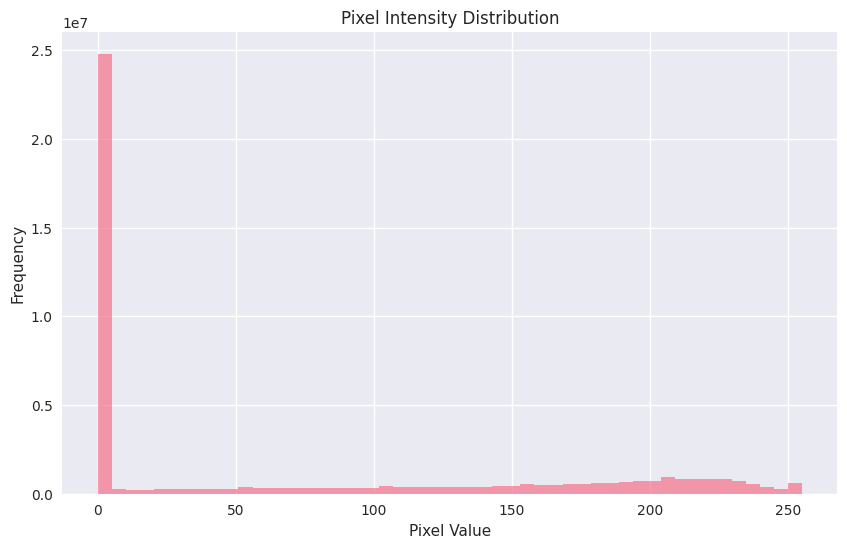

/tmp/ipykernel_29479/4083407691.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(brightness_data, labels=class_names)


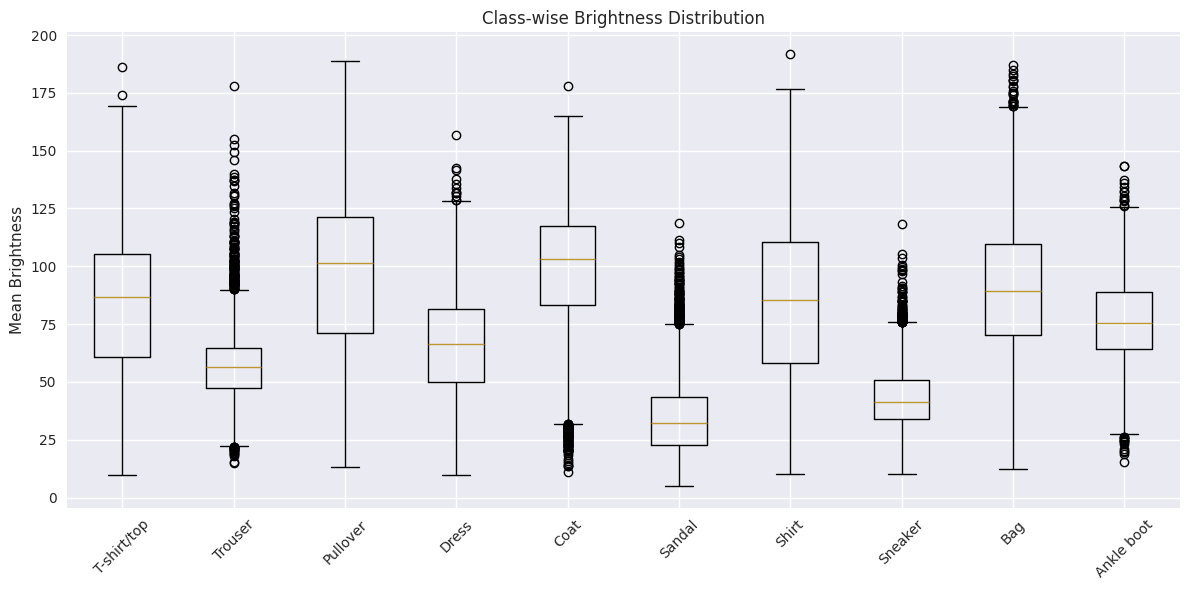


Global Statistics:
Mean pixel value: 72.94
Standard deviation: 90.02


,mean,std,min,max,median
T-shirt/top,83.03,89.44,0.0,255.0,48.0
Trouser,56.84,87.60,0.0,255.0,0.0
Pullover,96.06,91.46,0.0,255.0,83.0
Dress,66.02,90.33,0.0,255.0,0.0
Coat,98.26,95.96,0.0,255.0,87.0
Sandal,34.87,67.09,0.0,255.0,0.0
Shirt,84.61,86.52,0.0,255.0,62.0
Sneaker,42.76,75.17,0.0,255.0,0.0
Bag,90.16,93.14,0.0,255.0,62.0
Ankle boot,76.81,94.49,0.0,255.0,0.0


In [5]:
# 2. Statistical Analysis
def statistical_analysis():
    # Global statistics
    global_mean = np.mean(X_train)
    global_std = np.std(X_train)
    
    # Class-specific statistics
    class_stats = {}
    for i in range(10):
        class_data = X_train[y_train == i]
        class_stats[class_names[i]] = {
            'mean': float(np.mean(class_data)),
            'std': float(np.std(class_data)),
            'min': float(np.min(class_data)),
            'max': float(np.max(class_data)),
            'median': float(np.median(class_data))
        }
    
    # Pixel intensity distribution
    plt.figure(figsize=(10, 6))
    plt.hist(X_train.flatten(), bins=50, alpha=0.7)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.savefig('./analysis_results/02_pixel_intensity_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Class-wise brightness analysis
    fig, ax = plt.subplots(figsize=(12, 6))
    brightness_data = []
    for i in range(10):
        class_data = X_train[y_train == i]
        brightness_data.append(np.mean(class_data, axis=(1, 2)))
    
    ax.boxplot(brightness_data, labels=class_names)
    ax.set_title('Class-wise Brightness Distribution')
    ax.set_ylabel('Mean Brightness')
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.savefig('./analysis_results/02_class_brightness_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Save statistical data
    stats_data = {
        'global_statistics': {
            'mean': float(global_mean),
            'std': float(global_std)
        },
        'class_statistics': class_stats
    }
    
    with open('./analysis_results/02_statistical_analysis.json', 'w') as f:
        json.dump(stats_data, f, indent=4)
    
    # Display summary statistics
    print("\nGlobal Statistics:")
    print(f"Mean pixel value: {global_mean:.2f}")
    print(f"Standard deviation: {global_std:.2f}")
    
    # Create a DataFrame for class statistics
    stats_df = pd.DataFrame(class_stats).T
    display(stats_df.round(2))
    
    return stats_data

stats_data = statistical_analysis()

### **3. Visual Pattern Analysis**

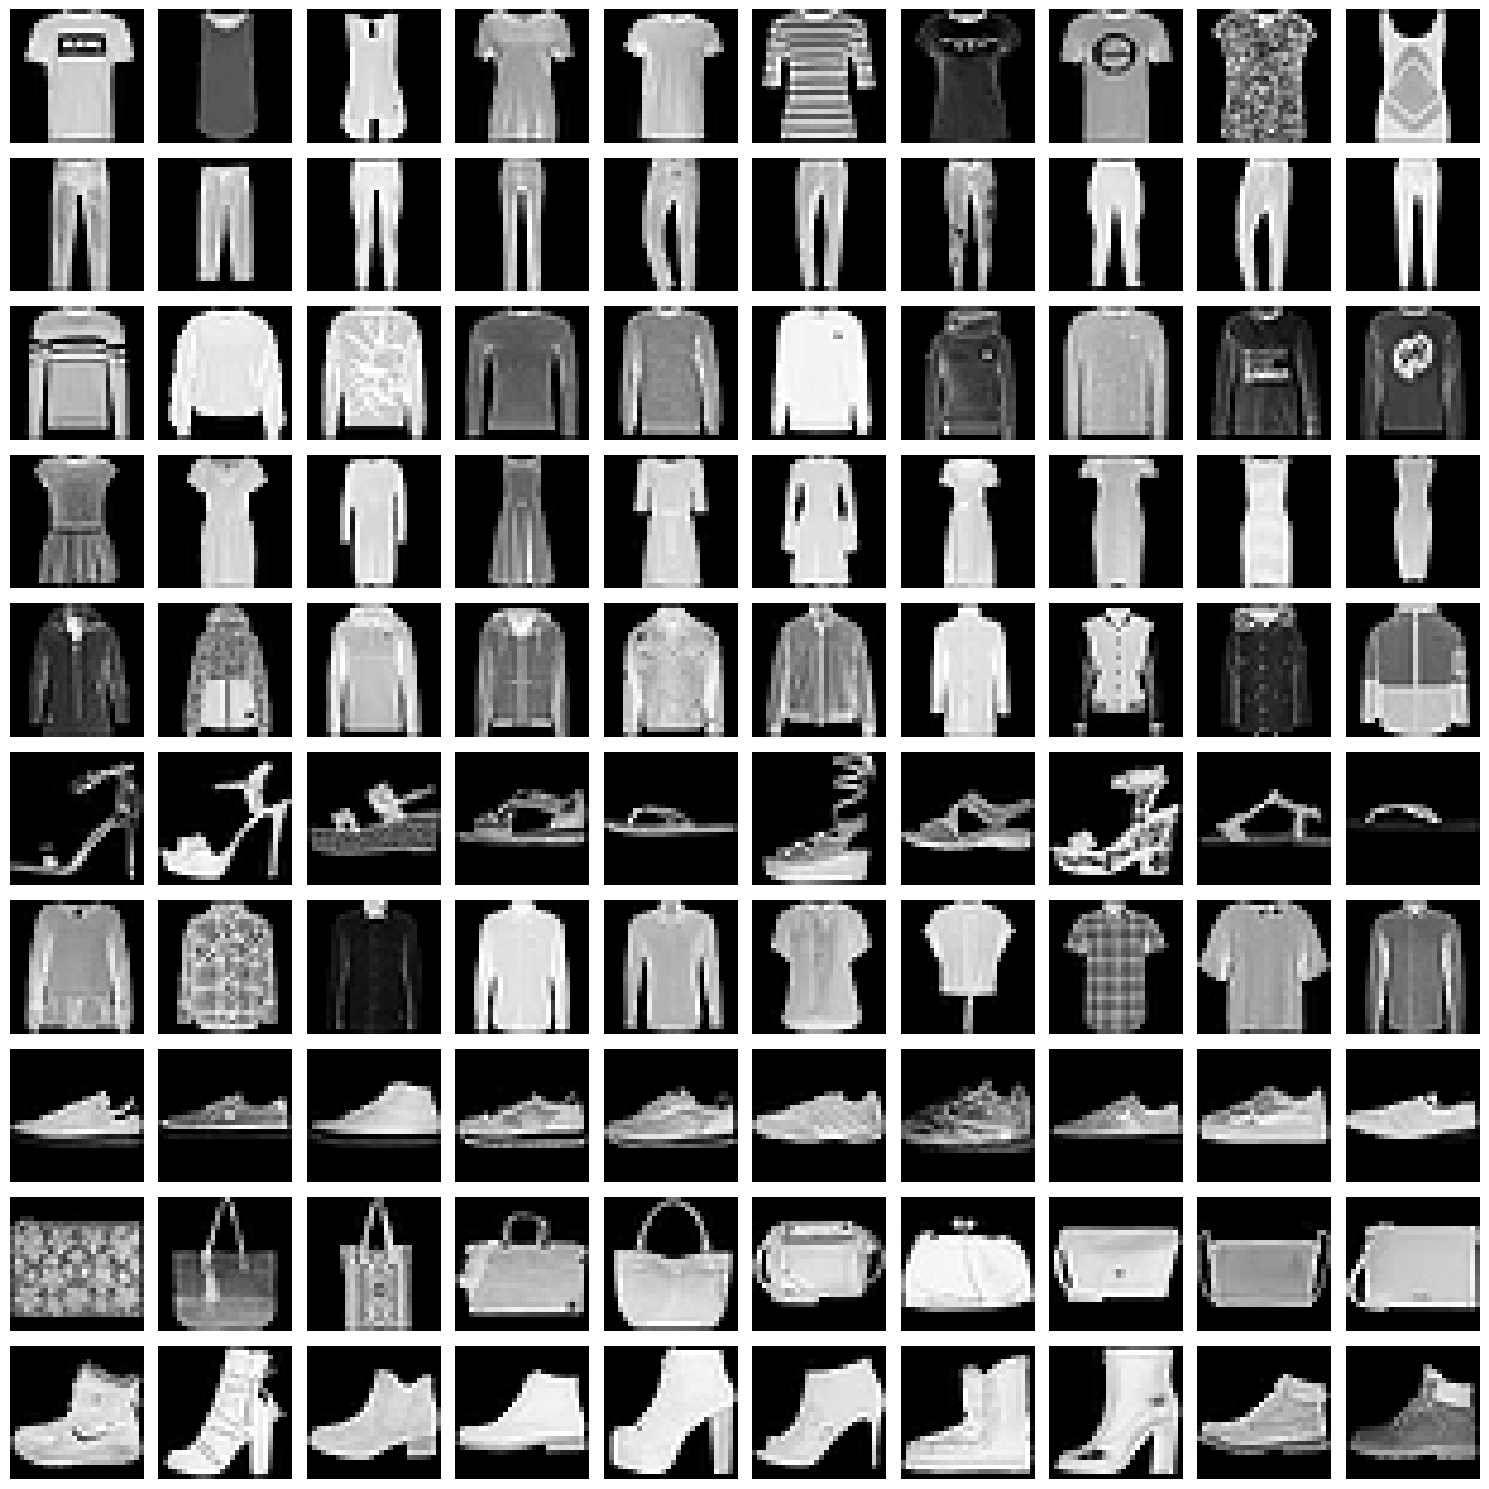

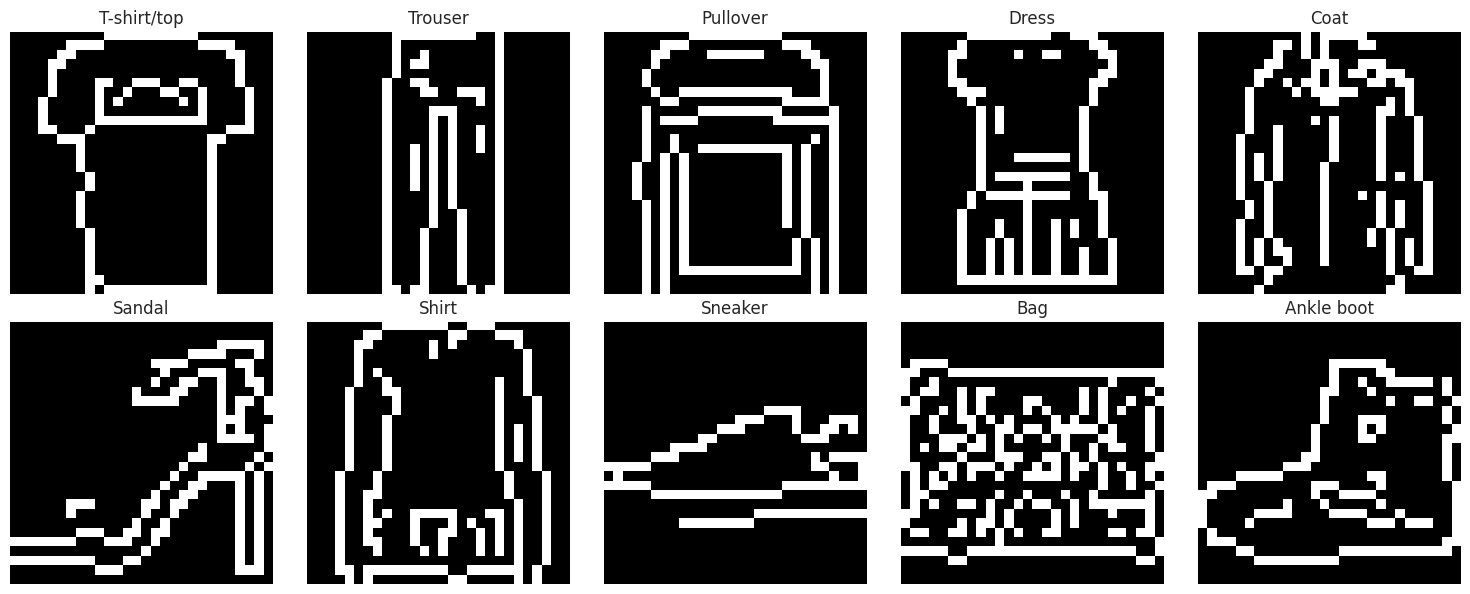

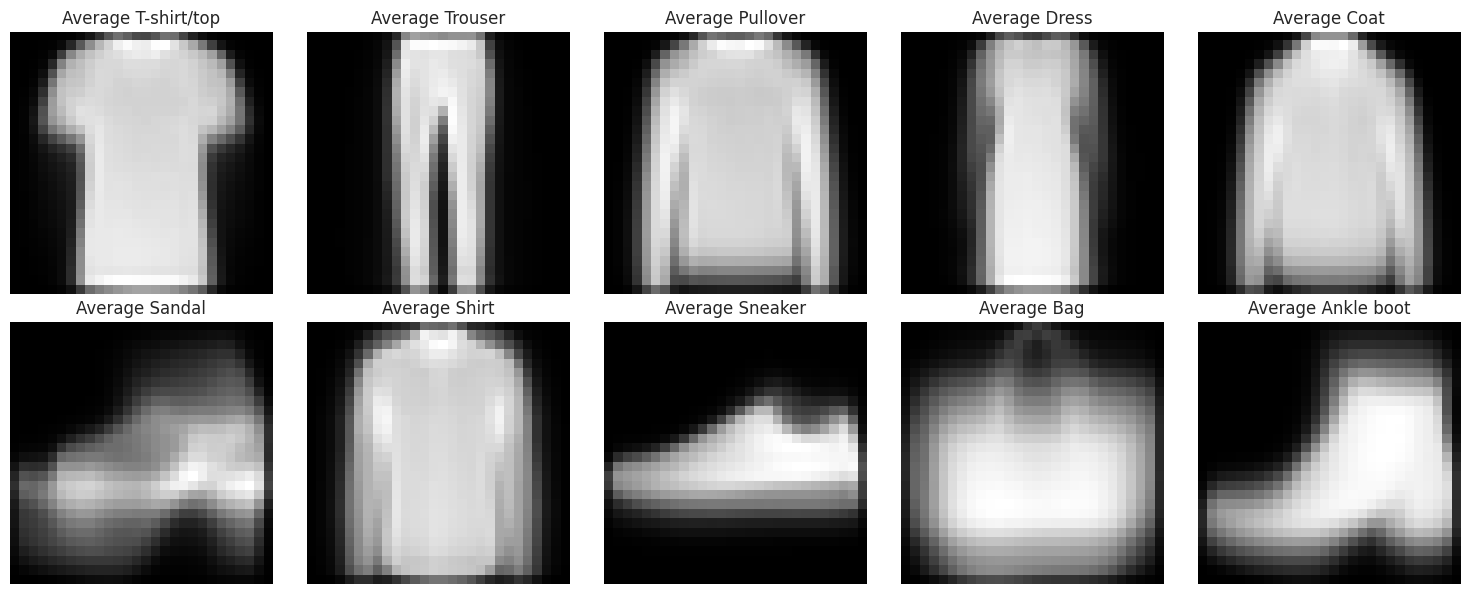

In [6]:
# 3. Visual Pattern Analysis
def visual_pattern_analysis():
    # Sample images for each class
    fig, axes = plt.subplots(10, 10, figsize=(15, 15))
    for i in range(10):
        class_indices = np.where(y_train == i)[0][:10]
        for j in range(10):
            axes[i, j].imshow(X_train[class_indices[j]], cmap='gray')
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_ylabel(class_names[i], rotation=90, size='large')
    
    plt.tight_layout()
    plt.savefig('./analysis_results/03_class_samples.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Edge detection analysis
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i in range(10):
        class_example = X_train[y_train == i][0]
        edges = cv2.Canny(class_example, 100, 200)
        
        ax = axes[i // 5, i % 5]
        ax.imshow(edges, cmap='gray')
        ax.set_title(class_names[i])
        ax.axis('off')
    
    plt.tight_layout()
    plt.savefig('./analysis_results/03_edge_detection_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Average image per class
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    average_images = []
    for i in range(10):
        class_images = X_train[y_train == i]
        avg_img = np.mean(class_images, axis=0)
        average_images.append(avg_img)
        
        ax = axes[i // 5, i % 5]
        ax.imshow(avg_img, cmap='gray')
        ax.set_title(f'Average {class_names[i]}')
        ax.axis('off')
    
    plt.tight_layout()
    plt.savefig('./analysis_results/03_average_class_images.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    return average_images

average_images = visual_pattern_analysis()

### **4. Dimensionality Analysis**

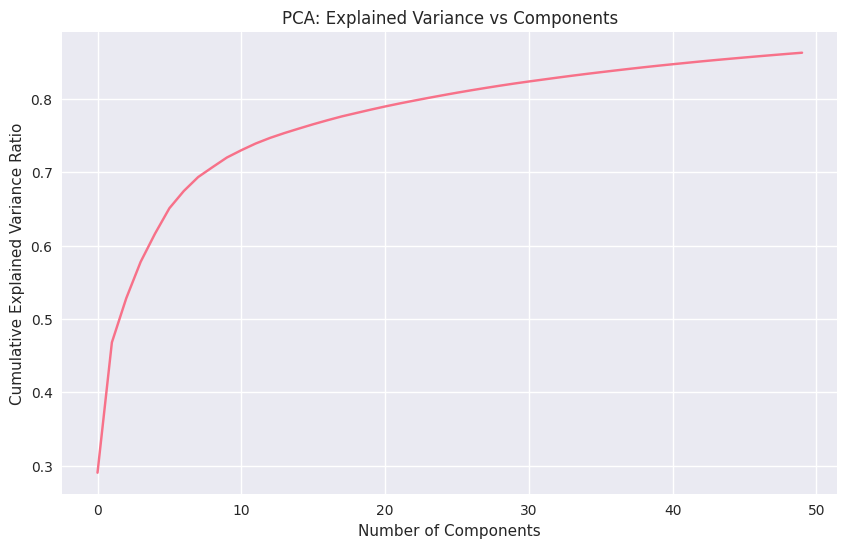

Computing t-SNE (this may take a minute)...


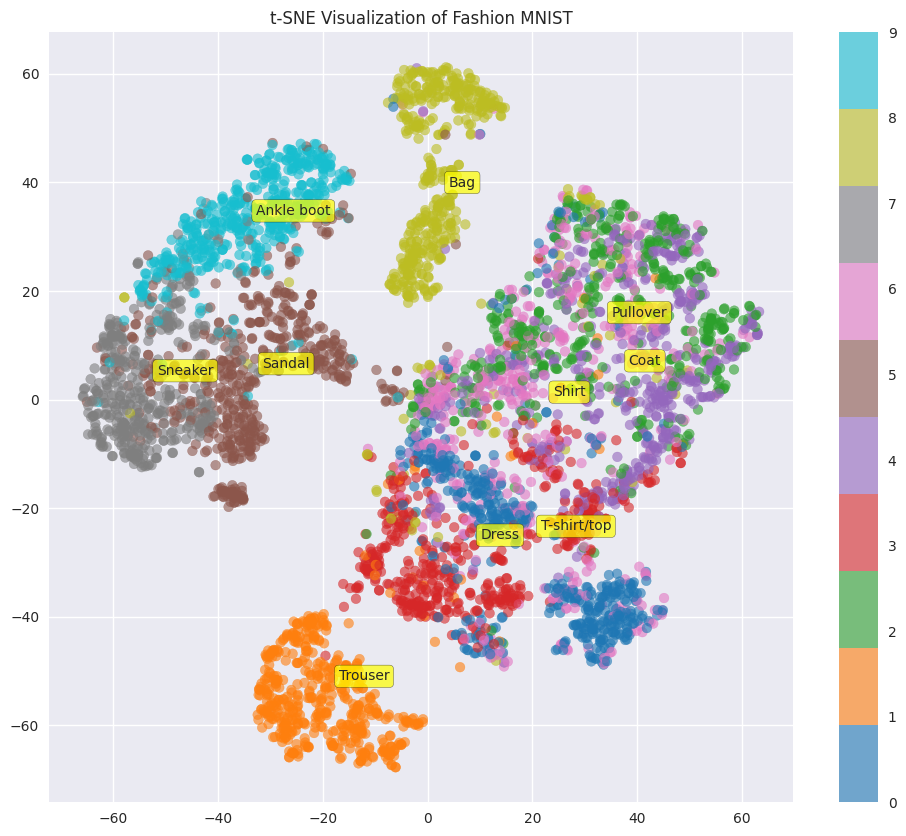


Components needed for 95% variance: 1


In [7]:
# 4. Dimensionality Analysis
def dimensionality_analysis():
    # Reshape data for analysis
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    
    # PCA Analysis
    pca = PCA(n_components=50)
    X_pca = pca.fit_transform(X_train_flat)
    
    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA: Explained Variance vs Components')
    plt.grid(True)
    plt.savefig('./analysis_results/04_pca_explained_variance.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # t-SNE visualization (using a subset for efficiency)
    np.random.seed(42)
    subset_indices = np.random.choice(len(X_train_flat), 5000, replace=False)
    X_subset = X_train_flat[subset_indices]
    y_subset = y_train[subset_indices]
    
    print("Computing t-SNE (this may take a minute)...")
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_subset)
    
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='tab10', alpha=0.6)
    plt.colorbar(scatter)
    plt.title('t-SNE Visualization of Fashion MNIST')
    
    # Add class labels
    for i in range(10):
        plt.annotate(class_names[i], 
                    xy=(np.mean(X_tsne[y_subset == i, 0]), 
                        np.mean(X_tsne[y_subset == i, 1])),
                    xytext=(5, 5), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.7))
    
    plt.savefig('./analysis_results/04_tsne_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Save dimensionality data
    dim_data = {
        'pca_explained_variance_ratio': pca.explained_variance_ratio_.tolist(),
        'pca_components_needed_95': int(np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1)
    }
    
    with open('./analysis_results/04_dimensionality_analysis.json', 'w') as f:
        json.dump(dim_data, f, indent=4)
    
    print(f"\nComponents needed for 95% variance: {dim_data['pca_components_needed_95']}")
    
    return dim_data

dim_data = dimensionality_analysis()

### **5. Class Relationship Analysis**

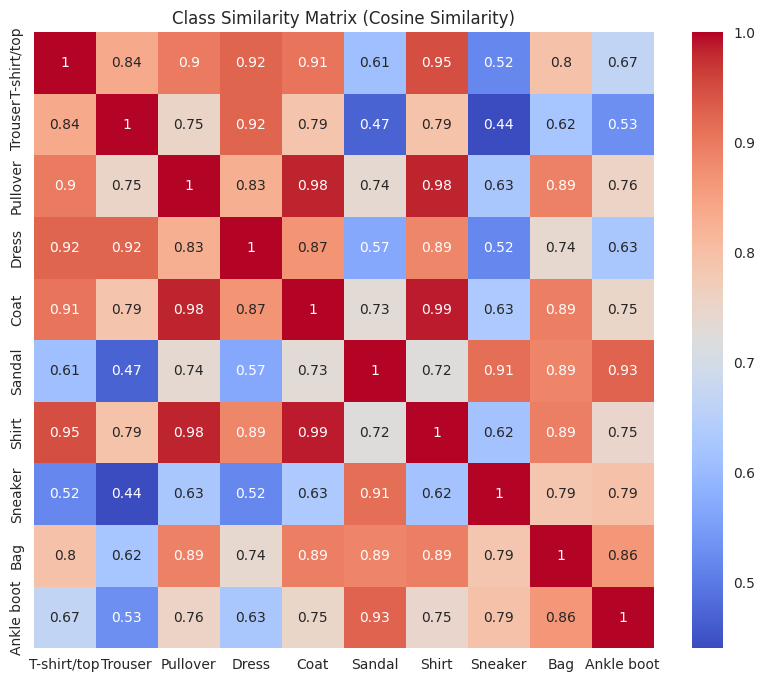


Most similar class pairs:
Coat - Shirt: 0.987
Pullover - Coat: 0.984
Pullover - Shirt: 0.983
T-shirt/top - Shirt: 0.949
Sandal - Ankle boot: 0.927

Least similar class pairs:
Trouser - Ankle boot: 0.529
T-shirt/top - Sneaker: 0.518
Dress - Sneaker: 0.517
Trouser - Sandal: 0.471
Trouser - Sneaker: 0.440


In [8]:
# 5. Class Relationship Analysis
def class_relationship_analysis():
    # Calculate class centroids
    centroids = []
    for i in range(10):
        class_images = X_train[y_train == i]
        centroid = np.mean(class_images, axis=0)
        centroids.append(centroid.flatten())
    
    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(centroids)
    
    # Plot similarity heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', 
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Class Similarity Matrix (Cosine Similarity)')
    plt.savefig('./analysis_results/05_class_similarity_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Identify most similar class pairs
    similar_pairs = []
    for i in range(10):
        for j in range(i + 1, 10):
            similar_pairs.append({
                'class1': class_names[i],
                'class2': class_names[j],
                'similarity': float(similarity_matrix[i, j])
            })
    
    similar_pairs.sort(key=lambda x: x['similarity'], reverse=True)
    
    # Save relationship data
    relationship_data = {
        'similarity_matrix': similarity_matrix.tolist(),
        'most_similar_pairs': similar_pairs[:5],
        'least_similar_pairs': similar_pairs[-5:]
    }
    
    with open('./analysis_results/05_class_relationships.json', 'w') as f:
        json.dump(relationship_data, f, indent=4)
    
    # Display most and least similar pairs
    print("\nMost similar class pairs:")
    for pair in relationship_data['most_similar_pairs']:
        print(f"{pair['class1']} - {pair['class2']}: {pair['similarity']:.3f}")
    
    print("\nLeast similar class pairs:")
    for pair in relationship_data['least_similar_pairs']:
        print(f"{pair['class1']} - {pair['class2']}: {pair['similarity']:.3f}")
    
    return relationship_data

relationship_data = class_relationship_analysis()

### **6. Data Quality Assessment**

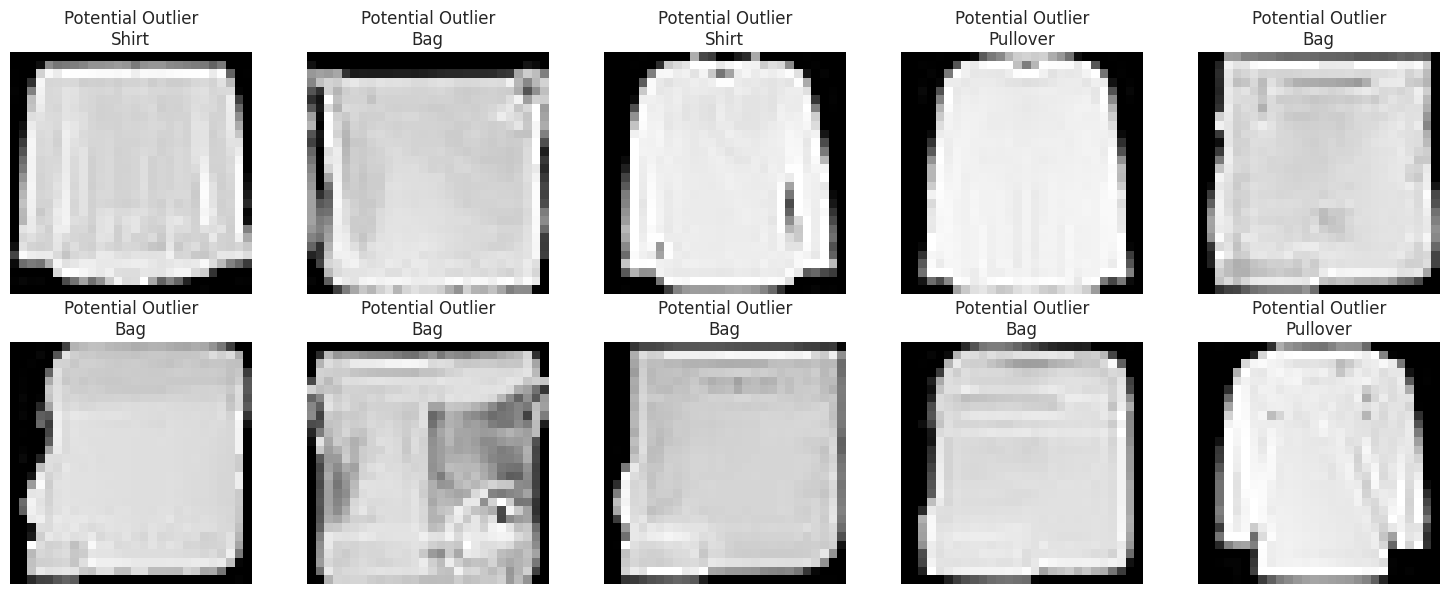


Data Quality Assessment:
Outlier count: 37
Outlier percentage: 0.06%
Data range: [0.0, 255.0]
Contains null values: False
Data type: uint8


In [9]:
# 6. Data Quality Assessment
def data_quality_assessment():
    # Check for outliers using z-score
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    mean_intensity = np.mean(X_train_flat, axis=1)
    z_scores = (mean_intensity - np.mean(mean_intensity)) / np.std(mean_intensity)
    
    outlier_indices = np.where(np.abs(z_scores) > 3)[0]
    
    # Plot potential outliers
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()
    for i, idx in enumerate(outlier_indices[:10]):
        axes[i].imshow(X_train[idx], cmap='gray')
        axes[i].set_title(f'Potential Outlier\n{class_names[y_train[idx]]}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.savefig('./analysis_results/06_potential_outliers.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Check data consistency
    quality_data = {
        'outlier_count': len(outlier_indices),
        'outlier_percentage': float(len(outlier_indices) / len(X_train) * 100),
        'data_range': {
            'min': float(np.min(X_train)),
            'max': float(np.max(X_train))
        },
        'null_values': bool(np.isnan(X_train).any()),
        'data_type': str(X_train.dtype)
    }
    
    with open('./analysis_results/06_data_quality_assessment.json', 'w') as f:
        json.dump(quality_data, f, indent=4)
    
    # Display quality summary
    print("\nData Quality Assessment:")
    print(f"Outlier count: {quality_data['outlier_count']}")
    print(f"Outlier percentage: {quality_data['outlier_percentage']:.2f}%")
    print(f"Data range: [{quality_data['data_range']['min']}, {quality_data['data_range']['max']}]")
    print(f"Contains null values: {quality_data['null_values']}")
    print(f"Data type: {quality_data['data_type']}")
    
    return quality_data

quality_data = data_quality_assessment()

### **7. Preprocessing Insights**

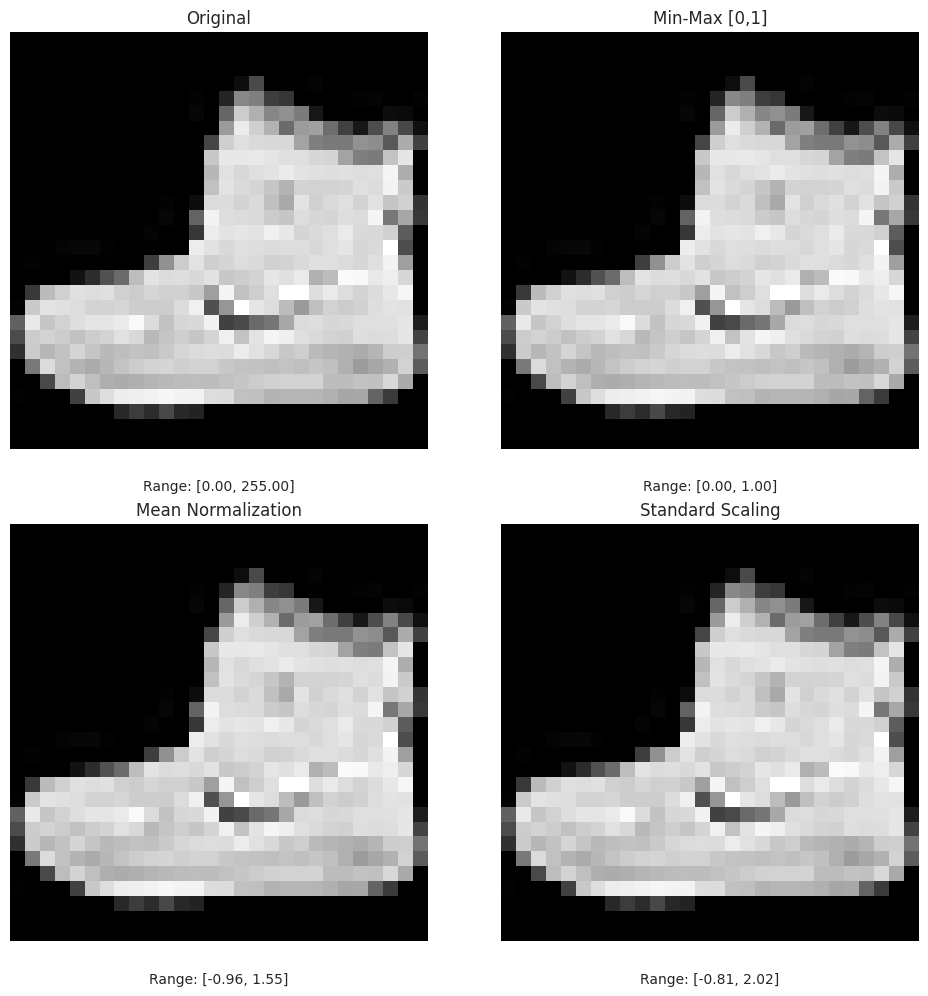

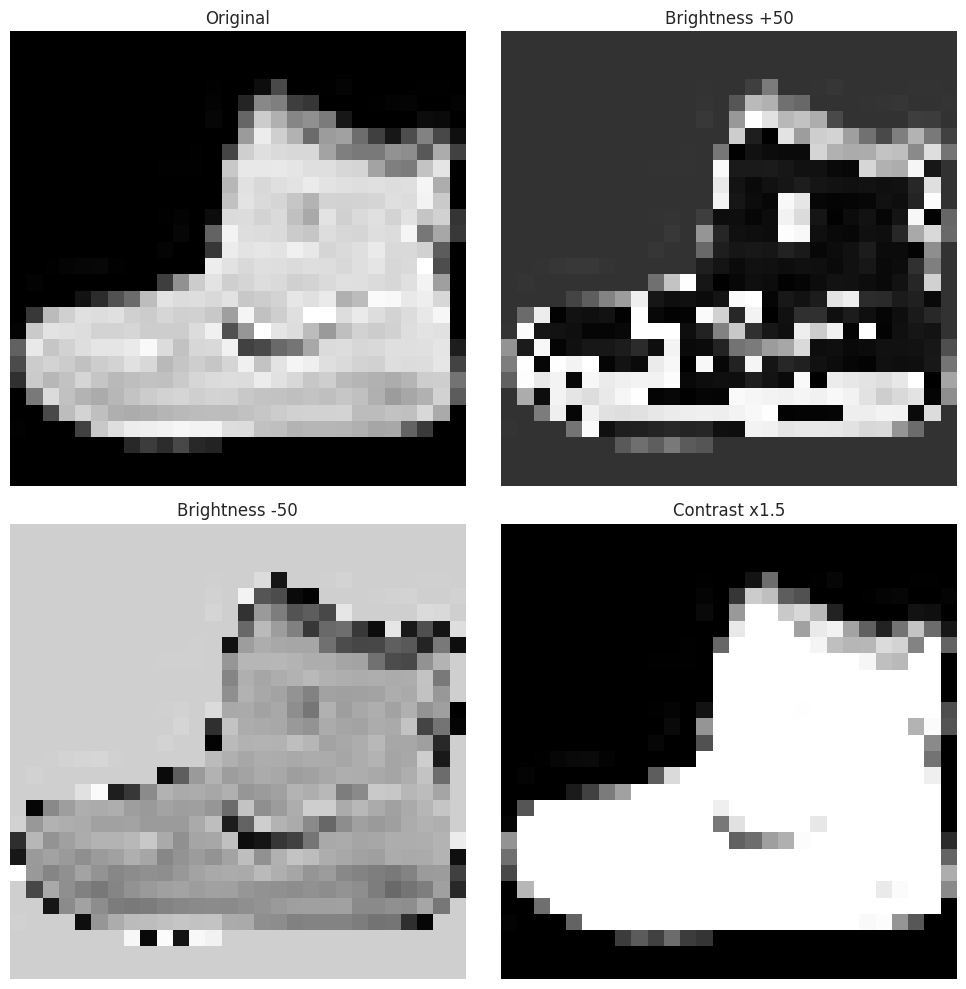


Preprocessing Recommendations:
Normalization: Min-Max [0,1]
Reason: Maintains relative pixel intensities while scaling to standard range

Suggested Augmentations:
- Random rotation (±10 degrees)
- Random horizontal flip
- Random brightness adjustment (±10%)
- Random zoom (0.9-1.1x)


In [10]:
# 7. Preprocessing Insights
def preprocessing_insights():
    # Compare normalization techniques
    sample_image = X_train[0]
    
    # Different normalization methods
    normalizations = {
        'Original': sample_image,
        'Min-Max [0,1]': sample_image / 255.0,
        'Mean Normalization': (sample_image - np.mean(sample_image)) / np.std(sample_image),
        'Standard Scaling': (sample_image - np.mean(X_train)) / np.std(X_train)
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()
    
    for i, (name, img) in enumerate(normalizations.items()):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(name)
        axes[i].axis('off')
        
        # Add statistics
        axes[i].text(0.5, -0.1, f'Range: [{img.min():.2f}, {img.max():.2f}]', 
                    ha='center', transform=axes[i].transAxes)
    
    plt.tight_layout()
    plt.savefig('./analysis_results/07_normalization_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Analyze brightness and contrast effects
    augmentation_examples = {
        'Original': sample_image,
        'Brightness +50': np.clip(sample_image + 50, 0, 255),
        'Brightness -50': np.clip(sample_image - 50, 0, 255),
        'Contrast x1.5': np.clip(sample_image * 1.5, 0, 255)
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()
    
    for i, (name, img) in enumerate(augmentation_examples.items()):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(name)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.savefig('./analysis_results/07_augmentation_examples.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    preprocessing_recommendations = {
        'recommended_normalization': 'Min-Max [0,1]',
        'reason': 'Maintains relative pixel intensities while scaling to standard range',
        'augmentation_suggestions': [
            'Random rotation (±10 degrees)',
            'Random horizontal flip',
            'Random brightness adjustment (±10%)',
            'Random zoom (0.9-1.1x)'
        ]
    }
    
    with open('./analysis_results/07_preprocessing_insights.json', 'w') as f:
        json.dump(preprocessing_recommendations, f, indent=4)
    
    # Display recommendations
    print("\nPreprocessing Recommendations:")
    print(f"Normalization: {preprocessing_recommendations['recommended_normalization']}")
    print(f"Reason: {preprocessing_recommendations['reason']}")
    print("\nSuggested Augmentations:")
    for aug in preprocessing_recommendations['augmentation_suggestions']:
        print(f"- {aug}")
    
    return preprocessing_recommendations

preprocessing_data = preprocessing_insights()

### **8. Performance Predictions**

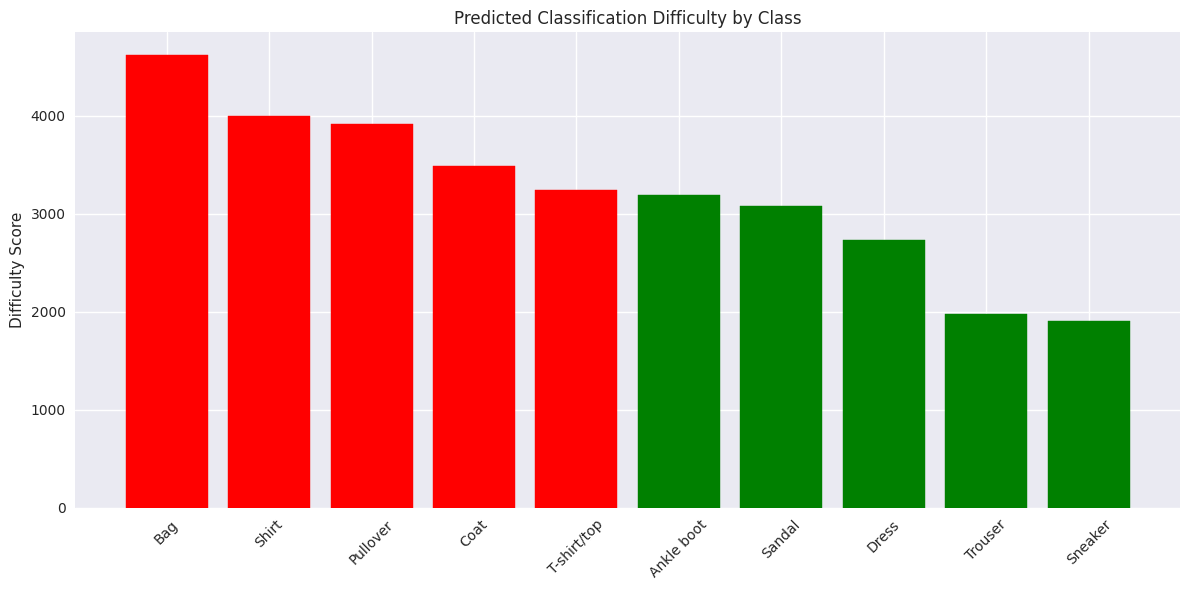


Predicted Class Difficulty (most to least difficult):
1. Bag (Difficulty Score: 4622.97)
   Most similar to: Coat (Similarity: 0.894)
2. Shirt (Difficulty Score: 3996.98)
   Most similar to: Coat (Similarity: 0.987)
3. Pullover (Difficulty Score: 3916.03)
   Most similar to: Coat (Similarity: 0.984)
4. Coat (Difficulty Score: 3488.38)
   Most similar to: Shirt (Similarity: 0.987)
5. T-shirt/top (Difficulty Score: 3242.51)
   Most similar to: Shirt (Similarity: 0.949)
6. Ankle boot (Difficulty Score: 3198.08)
   Most similar to: Sandal (Similarity: 0.927)
7. Sandal (Difficulty Score: 3077.62)
   Most similar to: Ankle boot (Similarity: 0.927)
8. Dress (Difficulty Score: 2738.02)
   Most similar to: Trouser (Similarity: 0.925)
9. Trouser (Difficulty Score: 1974.43)
   Most similar to: Dress (Similarity: 0.925)
10. Sneaker (Difficulty Score: 1908.78)
   Most similar to: Sandal (Similarity: 0.913)


In [11]:
# 8. Performance Predictions
def performance_predictions():
    # Based on analysis, predict difficulty of classification
    class_difficulty = []
    
    for i in range(10):
        class_images = X_train[y_train == i]
        
        # Calculate intra-class variance
        variance = np.mean(np.var(class_images, axis=0))
        
        # Get similarity to other classes
        similar_classes = []
        for j in range(10):
            if i != j:
                similarity = relationship_data['similarity_matrix'][i][j]
                similar_classes.append((class_names[j], similarity))
        
        similar_classes.sort(key=lambda x: x[1], reverse=True)
        
        class_difficulty.append({
            'class': class_names[i],
            'variance': float(variance),
            'most_similar_to': similar_classes[0][0],
            'similarity_score': float(similar_classes[0][1])
        })
    
    # Sort by difficulty (higher variance and similarity = more difficult)
    class_difficulty.sort(key=lambda x: x['variance'] * x['similarity_score'], reverse=True)
    
    # Create visualization
    fig, ax = plt.subplots(figsize=(12, 6))
    
    classes = [item['class'] for item in class_difficulty]
    difficulty_scores = [item['variance'] * item['similarity_score'] for item in class_difficulty]
    
    bars = ax.bar(classes, difficulty_scores)
    ax.set_ylabel('Difficulty Score')
    ax.set_title('Predicted Classification Difficulty by Class')
    ax.tick_params(axis='x', rotation=45)
    
    # Color bars based on difficulty
    for bar, score in zip(bars, difficulty_scores):
        if score > np.mean(difficulty_scores):
            bar.set_color('red')
        else:
            bar.set_color('green')
    
    plt.tight_layout()
    plt.savefig('./analysis_results/08_classification_difficulty_prediction.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    performance_data = {
        'class_difficulty_ranking': class_difficulty,
        'expected_confusion_pairs': [
            {'pair': [item['class'], item['most_similar_to']], 
             'similarity': item['similarity_score']} 
            for item in class_difficulty[:5]
        ],
        'estimated_accuracy_range': {
            'simple_model': '85-90%',
            'complex_model': '92-95%',
            'ensemble': '94-97%'
        }
    }
    
    with open('./analysis_results/08_performance_predictions.json', 'w') as f:
        json.dump(performance_data, f, indent=4)
    
    # Display difficulty ranking
    print("\nPredicted Class Difficulty (most to least difficult):")
    for i, item in enumerate(class_difficulty):
        print(f"{i+1}. {item['class']} (Difficulty Score: {item['variance'] * item['similarity_score']:.2f})")
        print(f"   Most similar to: {item['most_similar_to']} (Similarity: {item['similarity_score']:.3f})")
    
    return performance_data

performance_data = performance_predictions()

### **9. Comparative Analysis**

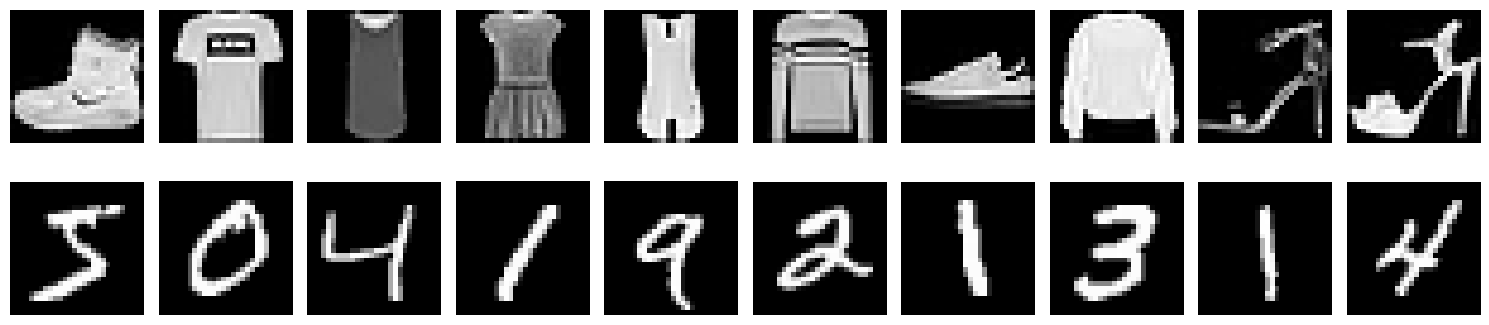

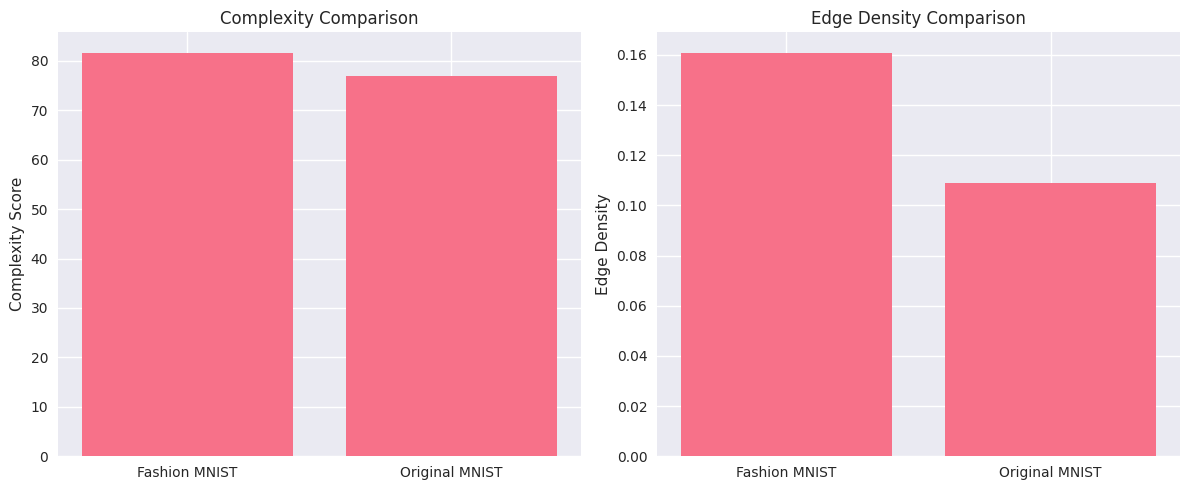


Comparative Analysis:
Fashion MNIST is 1.06x more complex
Fashion MNIST has 1.48x edge density

Key differences:
- Fashion MNIST has more complex patterns and textures
- Higher intra-class variability in Fashion MNIST
- More challenging due to visual similarity between classes
- Requires more sophisticated feature extraction


In [12]:
# 9. Comparative Analysis with Original MNIST
def comparative_analysis():
    # Load original MNIST for comparison
    from tensorflow.keras.datasets import mnist
    (mnist_train, _), _ = mnist.load_data()
    
    # Compare complexity
    fashion_complexity = np.mean(np.std(X_train, axis=(1, 2)))
    mnist_complexity = np.mean(np.std(mnist_train, axis=(1, 2)))
    
    # Compare edge density
    fashion_edges = np.mean([np.mean(cv2.Canny(img, 100, 200) > 0) for img in X_train[:1000]])
    mnist_edges = np.mean([np.mean(cv2.Canny(img, 100, 200) > 0) for img in mnist_train[:1000]])
    
    # Visual comparison
    fig, axes = plt.subplots(2, 10, figsize=(15, 4))
    
    for i in range(10):
        axes[0, i].imshow(X_train[i], cmap='gray')
        axes[0, i].axis('off')
        if i == 0:
            axes[0, 0].set_ylabel('Fashion\nMNIST', rotation=0, labelpad=40)
        
        axes[1, i].imshow(mnist_train[i], cmap='gray')
        axes[1, i].axis('off')
        if i == 0:
            axes[1, 0].set_ylabel('Original\nMNIST', rotation=0, labelpad=40)
    
    plt.tight_layout()
    plt.savefig('./analysis_results/09_mnist_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Create comparison bar chart
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Complexity comparison
    ax1.bar(['Fashion MNIST', 'Original MNIST'], [fashion_complexity, mnist_complexity])
    ax1.set_ylabel('Complexity Score')
    ax1.set_title('Complexity Comparison')
    
    # Edge density comparison
    ax2.bar(['Fashion MNIST', 'Original MNIST'], [fashion_edges, mnist_edges])
    ax2.set_ylabel('Edge Density')
    ax2.set_title('Edge Density Comparison')
    
    plt.tight_layout()
    plt.savefig('./analysis_results/09_complexity_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    comparison_data = {
        'complexity_comparison': {
            'fashion_mnist': float(fashion_complexity),
            'original_mnist': float(mnist_complexity),
            'complexity_ratio': float(fashion_complexity / mnist_complexity)
        },
        'edge_density_comparison': {
            'fashion_mnist': float(fashion_edges),
            'original_mnist': float(mnist_edges),
            'edge_ratio': float(fashion_edges / mnist_edges)
        },
        'key_differences': [
            'Fashion MNIST has more complex patterns and textures',
            'Higher intra-class variability in Fashion MNIST',
            'More challenging due to visual similarity between classes',
            'Requires more sophisticated feature extraction'
        ],
        'architecture_recommendations': [
            'Use deeper CNNs for Fashion MNIST',
            'Consider attention mechanisms',
            'Implement data augmentation',
            'Use ensemble methods for best performance'
        ]
    }
    
    with open('./analysis_results/09_comparative_analysis.json', 'w') as f:
        json.dump(comparison_data, f, indent=4)
    
    # Display comparison summary
    print("\nComparative Analysis:")
    print(f"Fashion MNIST is {comparison_data['complexity_comparison']['complexity_ratio']:.2f}x more complex")
    print(f"Fashion MNIST has {comparison_data['edge_density_comparison']['edge_ratio']:.2f}x edge density")
    print("\nKey differences:")
    for diff in comparison_data['key_differences']:
        print(f"- {diff}")
    
    return comparison_data

comparison_data = comparative_analysis()

### **Executive Summary Generation**

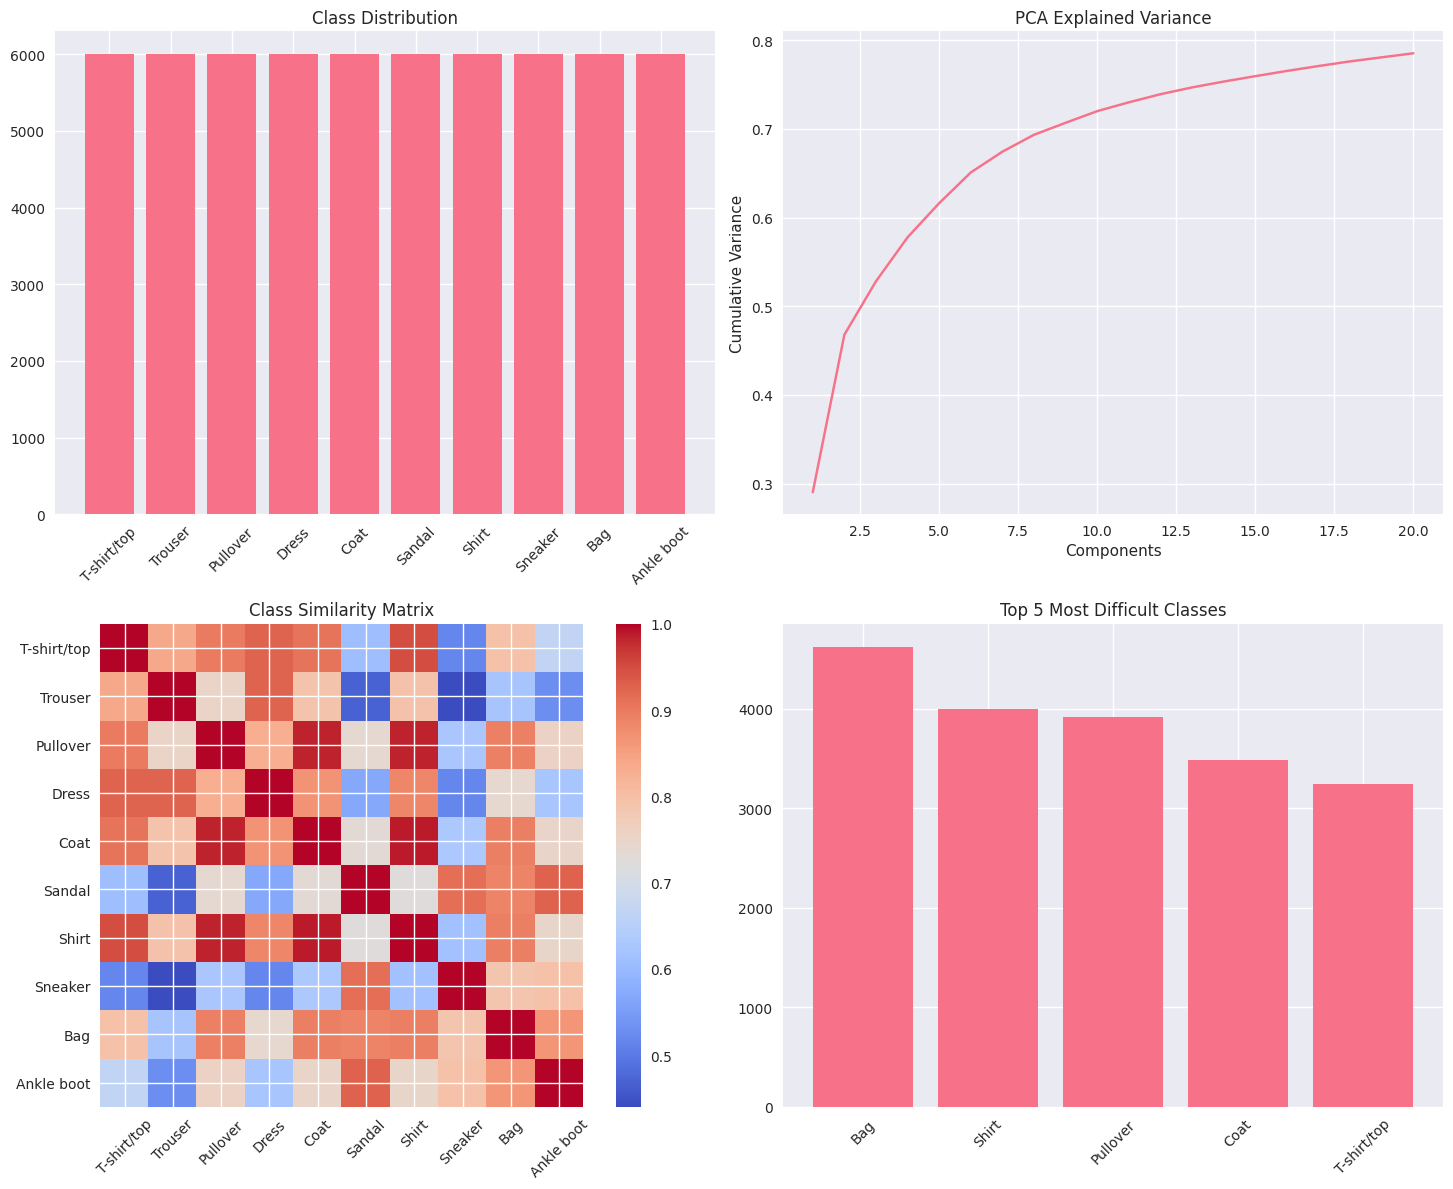


EXECUTIVE SUMMARY

Analysis Timestamp: 2025-04-27 11:04:58

Dataset Summary:
- Total samples: 70000
- Image dimensions: (28, 28)
- Number of classes: 10
- Class balance: Balanced (6,000 samples per class)

Key Findings:
- Data Quality: 0.06% potential outliers detected
- Dimensionality: 1 components explain 95% variance
- Class Relationships: Most similar classes: Coat and Shirt
- Complexity: 1.06x more complex than original MNIST

Recommendations:
- Preprocessing: Min-Max [0,1]
- Architecture: Use deeper CNNs for Fashion MNIST
- Expected Performance: 92-95%



In [13]:
# Generate Executive Summary
def generate_executive_summary():
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    summary = {
        'analysis_timestamp': timestamp,
        'dataset_summary': {
            'total_samples': overview_data['total_train_samples'] + overview_data['total_test_samples'],
            'image_dimensions': overview_data['image_shape'],
            'number_of_classes': 10,
            'class_balance': 'Balanced (6,000 samples per class)'
        },
        'key_findings': {
            'data_quality': f"{quality_data['outlier_percentage']:.2f}% potential outliers detected",
            'dimensionality': f"{dim_data['pca_components_needed_95']} components explain 95% variance",
            'class_relationships': f"Most similar classes: {relationship_data['most_similar_pairs'][0]['class1']} and {relationship_data['most_similar_pairs'][0]['class2']}",
            'complexity': f"{comparison_data['complexity_comparison']['complexity_ratio']:.2f}x more complex than original MNIST"
        },
        'recommendations': {
            'preprocessing': preprocessing_data['recommended_normalization'],
            'architecture': comparison_data['architecture_recommendations'][0],
            'expected_performance': performance_data['estimated_accuracy_range']['complex_model']
        }
    }
    
    with open('./analysis_results/10_executive_summary.json', 'w') as f:
        json.dump(summary, f, indent=4)
    
    # Create a visual summary
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Class distribution
    train_dist = np.bincount(y_train)
    ax1.bar(class_names, train_dist)
    ax1.set_title('Class Distribution')
    ax1.tick_params(axis='x', rotation=45)
    
    # PCA variance
    pca_variance = dim_data['pca_explained_variance_ratio'][:20]
    ax2.plot(range(1, 21), np.cumsum(pca_variance))
    ax2.set_title('PCA Explained Variance')
    ax2.set_xlabel('Components')
    ax2.set_ylabel('Cumulative Variance')
    ax2.grid(True)
    
    # Class similarity
    im = ax3.imshow(relationship_data['similarity_matrix'], cmap='coolwarm')
    ax3.set_xticks(range(10))
    ax3.set_yticks(range(10))
    ax3.set_xticklabels(class_names, rotation=45)
    ax3.set_yticklabels(class_names)
    ax3.set_title('Class Similarity Matrix')
    plt.colorbar(im, ax=ax3)
    
    # Difficulty prediction
    classes = [item['class'] for item in performance_data['class_difficulty_ranking']][:5]
    scores = [item['variance'] * item['similarity_score'] for item in performance_data['class_difficulty_ranking']][:5]
    ax4.bar(classes, scores)
    ax4.set_title('Top 5 Most Difficult Classes')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig('./analysis_results/10_executive_summary_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()  # Display in notebook
    
    # Display key findings
    print("\n" + "="*50)
    print("EXECUTIVE SUMMARY")
    print("="*50)
    print(f"\nAnalysis Timestamp: {timestamp}")
    
    print("\nDataset Summary:")
    print(f"- Total samples: {summary['dataset_summary']['total_samples']}")
    print(f"- Image dimensions: {summary['dataset_summary']['image_dimensions']}")
    print(f"- Number of classes: {summary['dataset_summary']['number_of_classes']}")
    print(f"- Class balance: {summary['dataset_summary']['class_balance']}")
   
    print("\nKey Findings:")
    for key, value in summary['key_findings'].items():
        print(f"- {key.replace('_', ' ').title()}: {value}")
    
    print("\nRecommendations:")
    for key, value in summary['recommendations'].items():
        print(f"- {key.replace('_', ' ').title()}: {value}")
    
    print("\n" + "="*50)
    
    return summary

executive_summary = generate_executive_summary()

### **Additional Visualization for Executive Summary (Dashboard)**

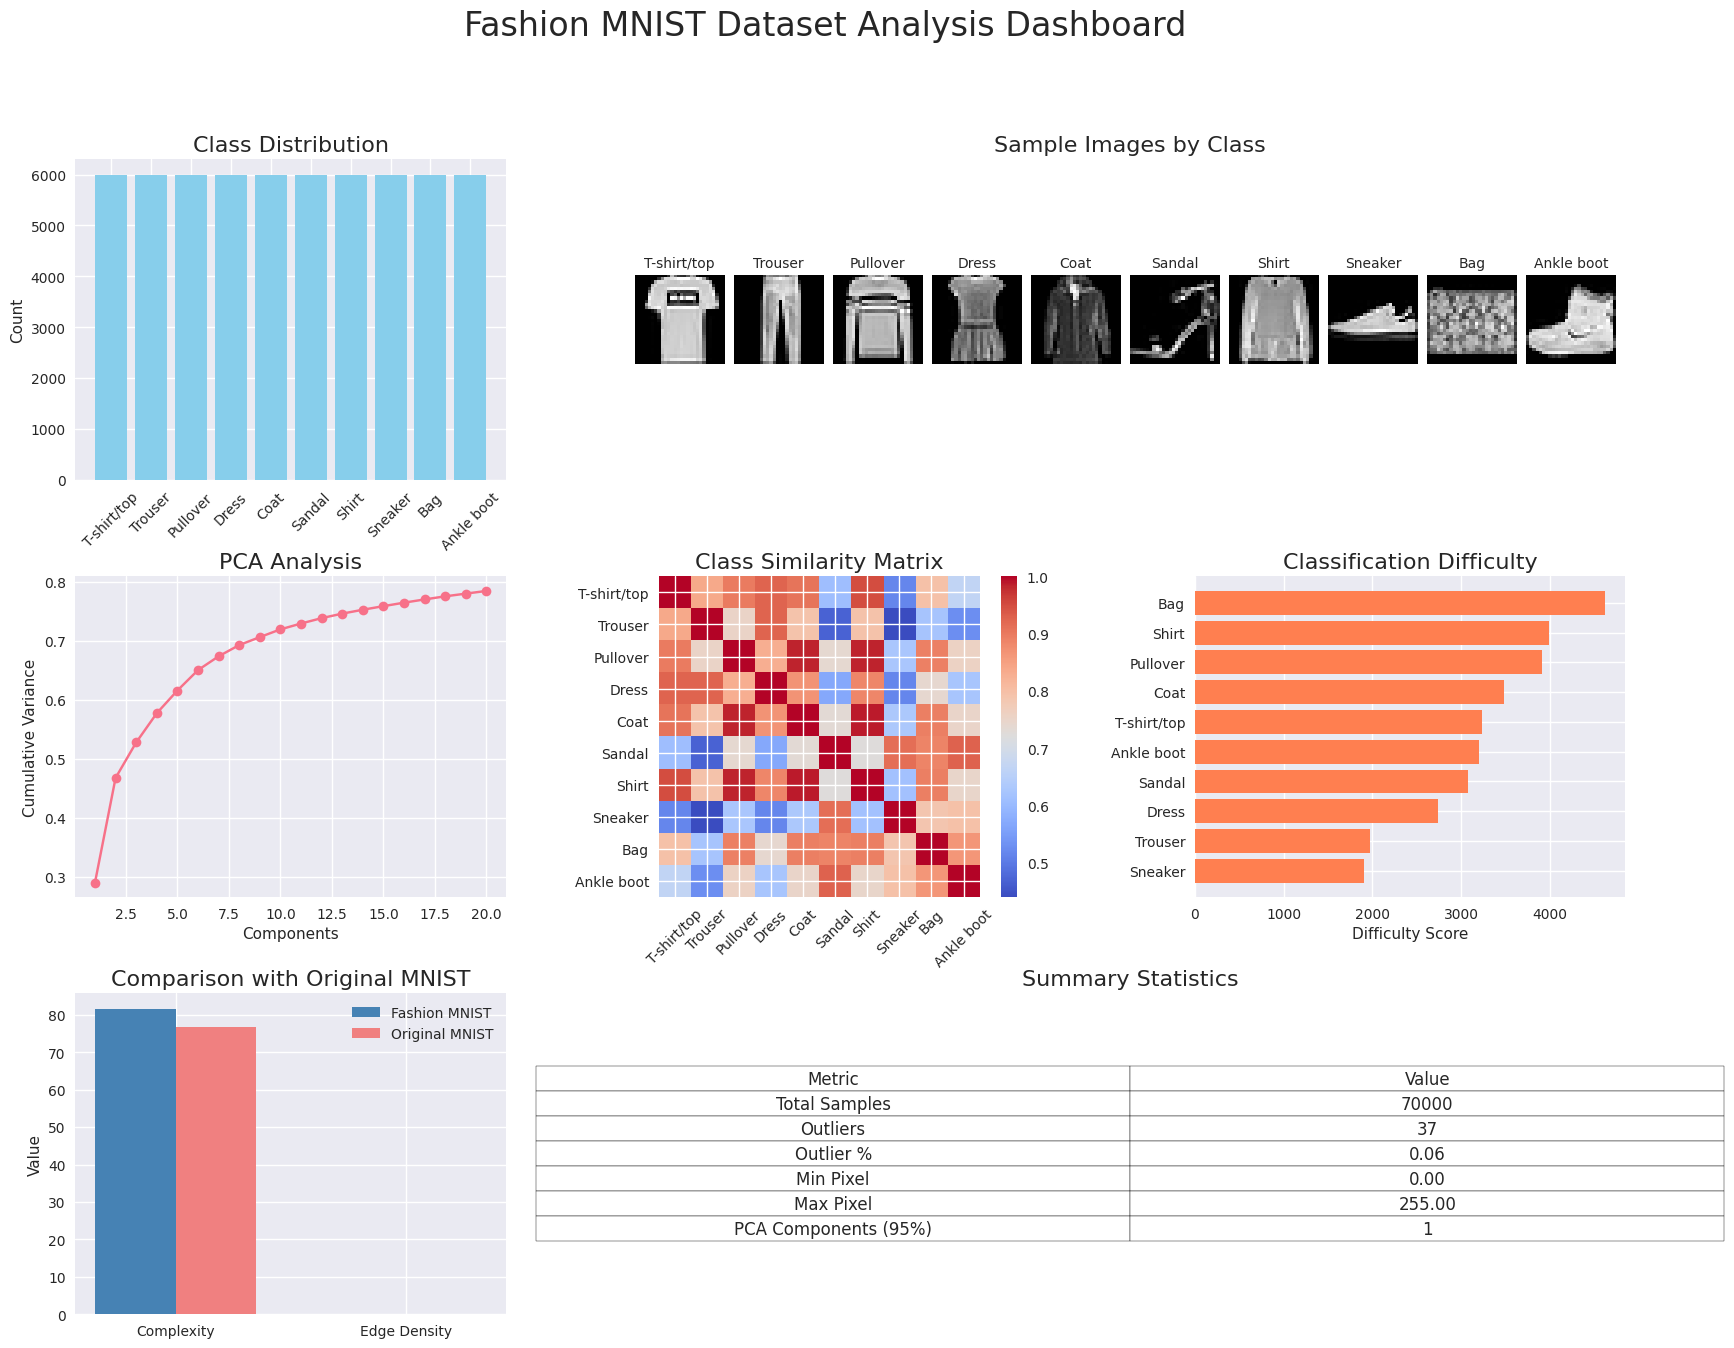

In [14]:
# Create an interactive dashboard-style summary
def create_dashboard_summary():
    # Create a large figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
    # 1. Class Distribution
    ax1 = fig.add_subplot(gs[0, 0])
    train_dist = np.bincount(y_train)
    ax1.bar(class_names, train_dist, color='skyblue')
    ax1.set_title('Class Distribution', fontsize=16)
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_ylabel('Count')
    
    # 2. Sample Images
    ax2 = fig.add_subplot(gs[0, 1:])
    for i in range(10):
        ax2_sub = ax2.inset_axes([(i/10), 0, 0.09, 1])
        ax2_sub.imshow(X_train[y_train == i][0], cmap='gray')
        ax2_sub.axis('off')
        ax2_sub.set_title(class_names[i], fontsize=10)
    ax2.set_title('Sample Images by Class', fontsize=16)
    ax2.axis('off')
    
    # 3. PCA Analysis
    ax3 = fig.add_subplot(gs[1, 0])
    pca_variance = dim_data['pca_explained_variance_ratio'][:20]
    ax3.plot(range(1, 21), np.cumsum(pca_variance), 'o-')
    ax3.set_xlabel('Components')
    ax3.set_ylabel('Cumulative Variance')
    ax3.set_title('PCA Analysis', fontsize=16)
    ax3.grid(True)
    
    # 4. Class Similarity
    ax4 = fig.add_subplot(gs[1, 1])
    im = ax4.imshow(relationship_data['similarity_matrix'], cmap='coolwarm')
    ax4.set_xticks(range(10))
    ax4.set_yticks(range(10))
    ax4.set_xticklabels(class_names, rotation=45)
    ax4.set_yticklabels(class_names)
    ax4.set_title('Class Similarity Matrix', fontsize=16)
    plt.colorbar(im, ax=ax4)
    
    # 5. Difficulty Prediction
    ax5 = fig.add_subplot(gs[1, 2])
    classes = [item['class'] for item in performance_data['class_difficulty_ranking']]
    scores = [item['variance'] * item['similarity_score'] for item in performance_data['class_difficulty_ranking']]
    bars = ax5.barh(classes, scores, color='coral')
    ax5.set_xlabel('Difficulty Score')
    ax5.set_title('Classification Difficulty', fontsize=16)
    ax5.invert_yaxis()
    
    # 6. Complexity Comparison
    ax6 = fig.add_subplot(gs[2, 0])
    comparison_metrics = ['Complexity', 'Edge Density']
    fashion_values = [
        comparison_data['complexity_comparison']['fashion_mnist'],
        comparison_data['edge_density_comparison']['fashion_mnist']
    ]
    mnist_values = [
        comparison_data['complexity_comparison']['original_mnist'],
        comparison_data['edge_density_comparison']['original_mnist']
    ]
    
    x = np.arange(len(comparison_metrics))
    width = 0.35
    ax6.bar(x - width/2, fashion_values, width, label='Fashion MNIST', color='steelblue')
    ax6.bar(x + width/2, mnist_values, width, label='Original MNIST', color='lightcoral')
    ax6.set_xticks(x)
    ax6.set_xticklabels(comparison_metrics)
    ax6.set_ylabel('Value')
    ax6.set_title('Comparison with Original MNIST', fontsize=16)
    ax6.legend()
    
    # 7. Data Quality Metrics
    ax7 = fig.add_subplot(gs[2, 1:])
    quality_metrics = {
        'Total Samples': overview_data['total_train_samples'] + overview_data['total_test_samples'],
        'Outliers': quality_data['outlier_count'],
        'Outlier %': quality_data['outlier_percentage'],
        'Min Pixel': quality_data['data_range']['min'],
        'Max Pixel': quality_data['data_range']['max'],
        'PCA Components (95%)': dim_data['pca_components_needed_95']
    }
    
    # Create a text table
    cell_text = [[key, f"{value:.2f}" if isinstance(value, float) else str(value)] 
                 for key, value in quality_metrics.items()]
    table = ax7.table(cellText=cell_text, colLabels=['Metric', 'Value'], 
                      cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)
    ax7.axis('off')
    ax7.set_title('Summary Statistics', fontsize=16)
    
    plt.suptitle('Fashion MNIST Dataset Analysis Dashboard', fontsize=24, y=0.98)
    plt.savefig('./analysis_results/11_analysis_dashboard.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create the dashboard summary
create_dashboard_summary()

### **Run all analyses**

Starting Fashion MNIST Analysis...

1. Dataset Overview...
------------------------------


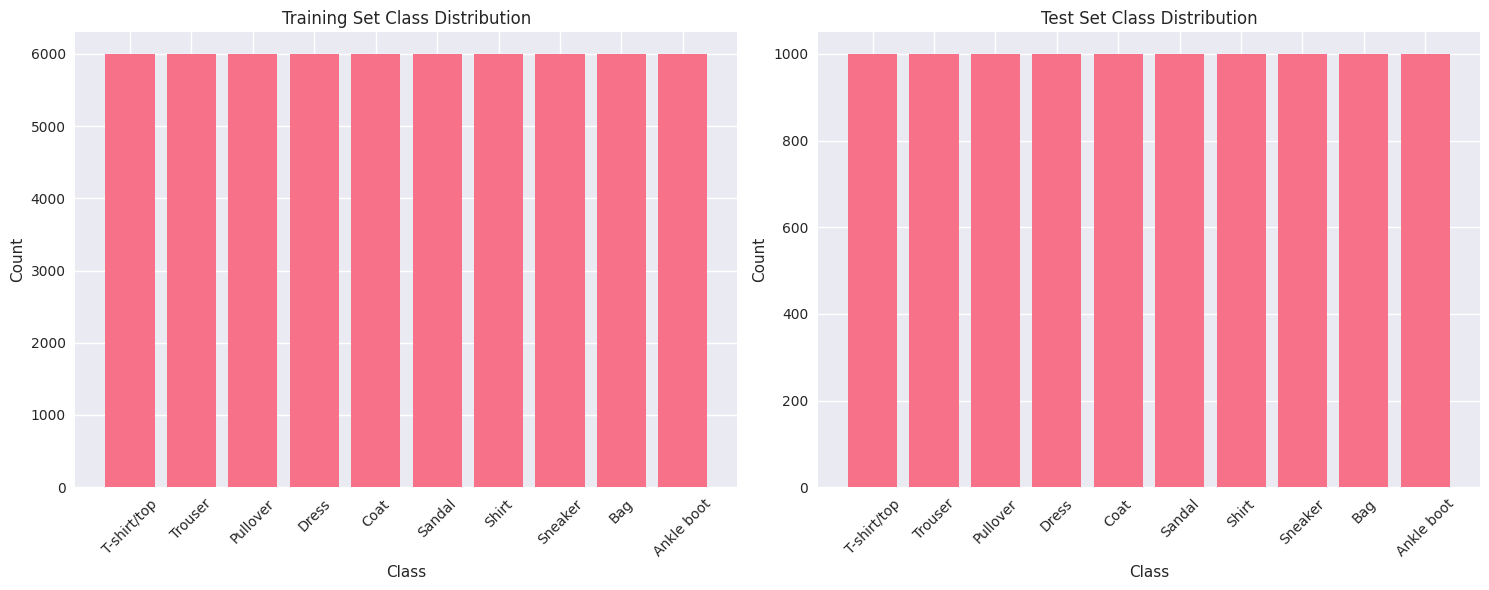


Dataset Overview:
Total training samples: 60000
Total test samples: 10000
Image shape: (28, 28)


2. Statistical Analysis...
------------------------------


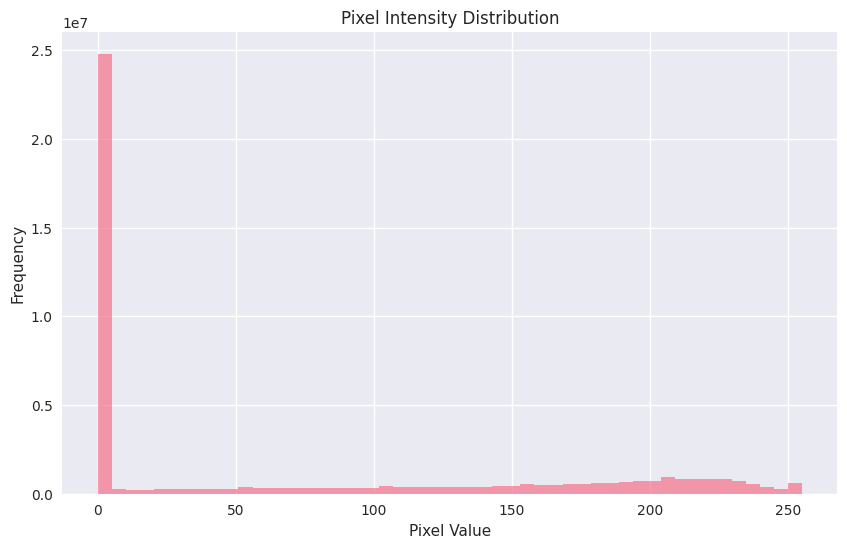

/tmp/ipykernel_29479/4083407691.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(brightness_data, labels=class_names)


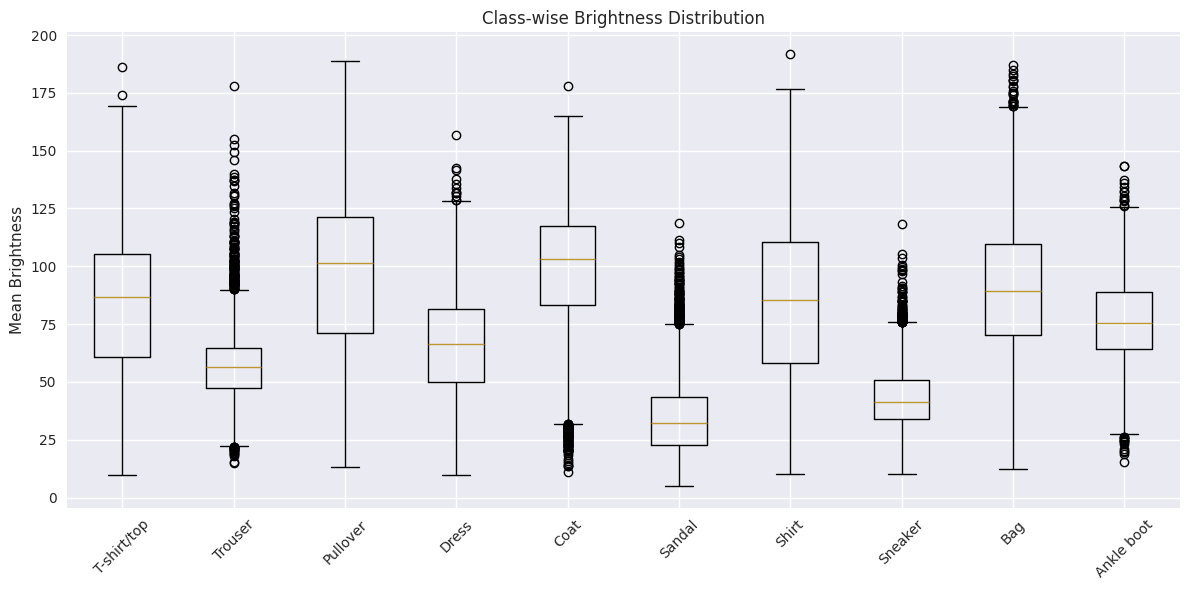


Global Statistics:
Mean pixel value: 72.94
Standard deviation: 90.02


,mean,std,min,max,median
T-shirt/top,83.03,89.44,0.0,255.0,48.0
Trouser,56.84,87.60,0.0,255.0,0.0
Pullover,96.06,91.46,0.0,255.0,83.0
Dress,66.02,90.33,0.0,255.0,0.0
Coat,98.26,95.96,0.0,255.0,87.0
Sandal,34.87,67.09,0.0,255.0,0.0
Shirt,84.61,86.52,0.0,255.0,62.0
Sneaker,42.76,75.17,0.0,255.0,0.0
Bag,90.16,93.14,0.0,255.0,62.0
Ankle boot,76.81,94.49,0.0,255.0,0.0




3. Visual Pattern Analysis...
------------------------------


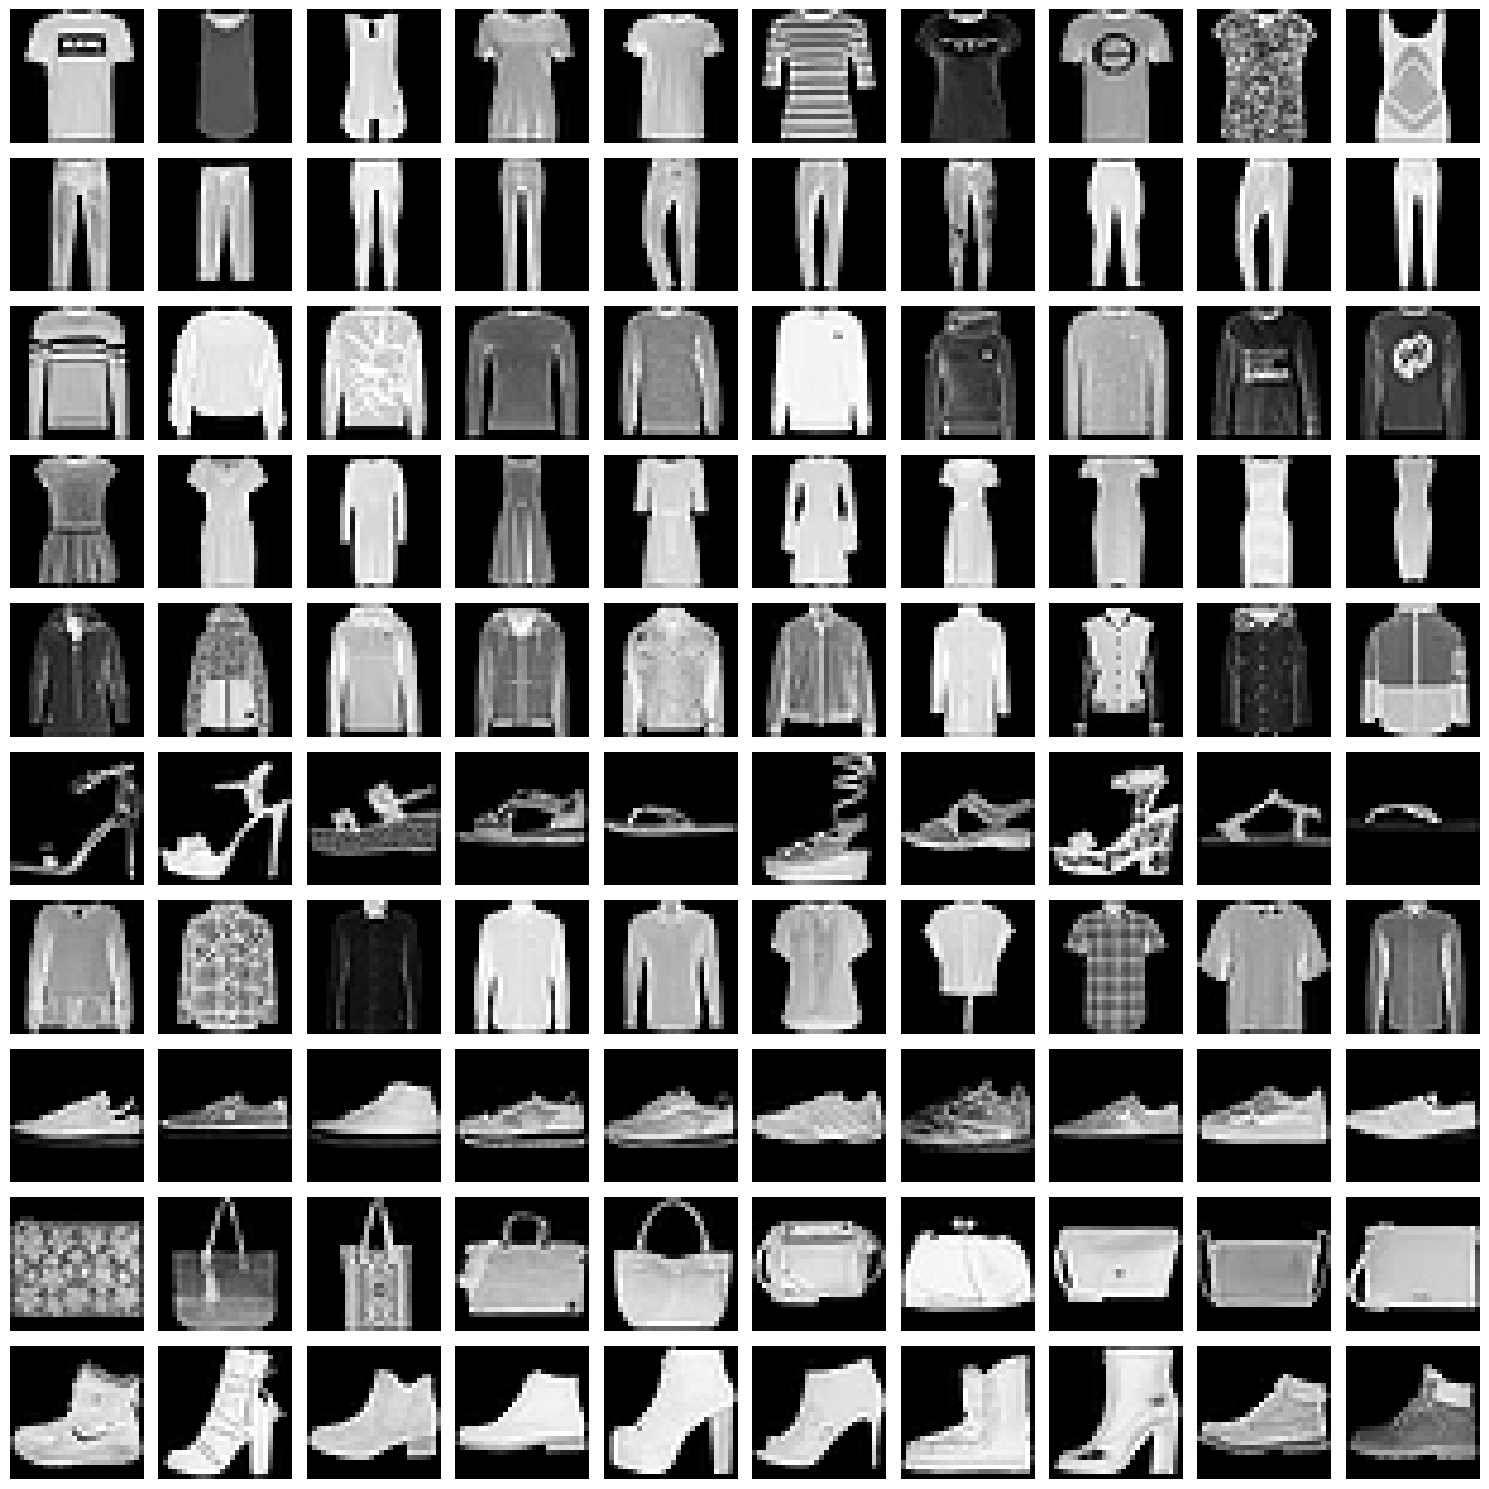

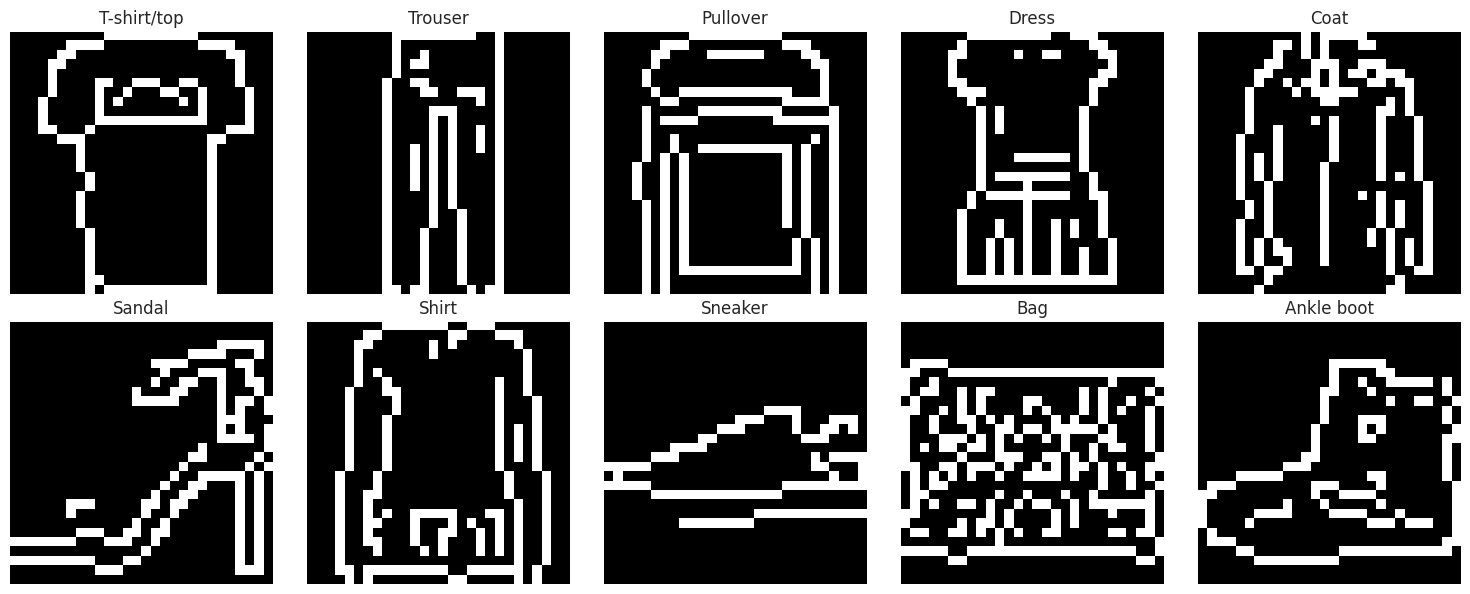

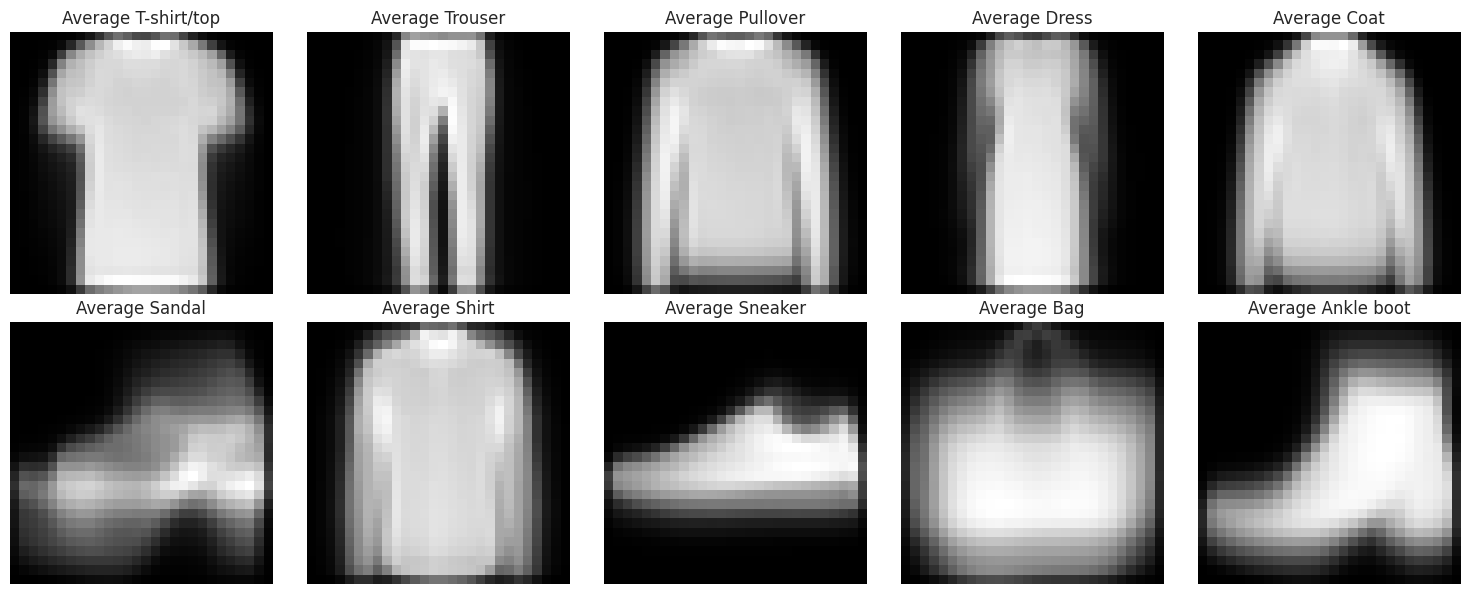



4. Dimensionality Analysis...
------------------------------


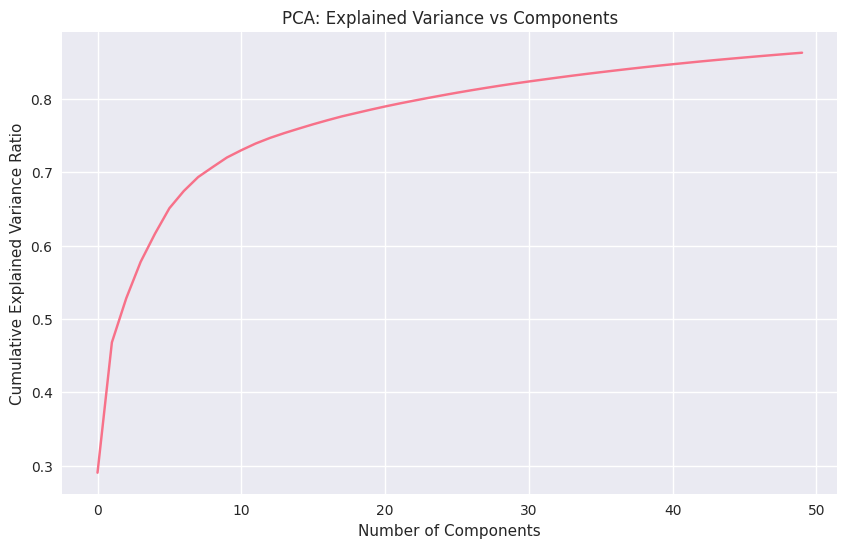

Computing t-SNE (this may take a minute)...


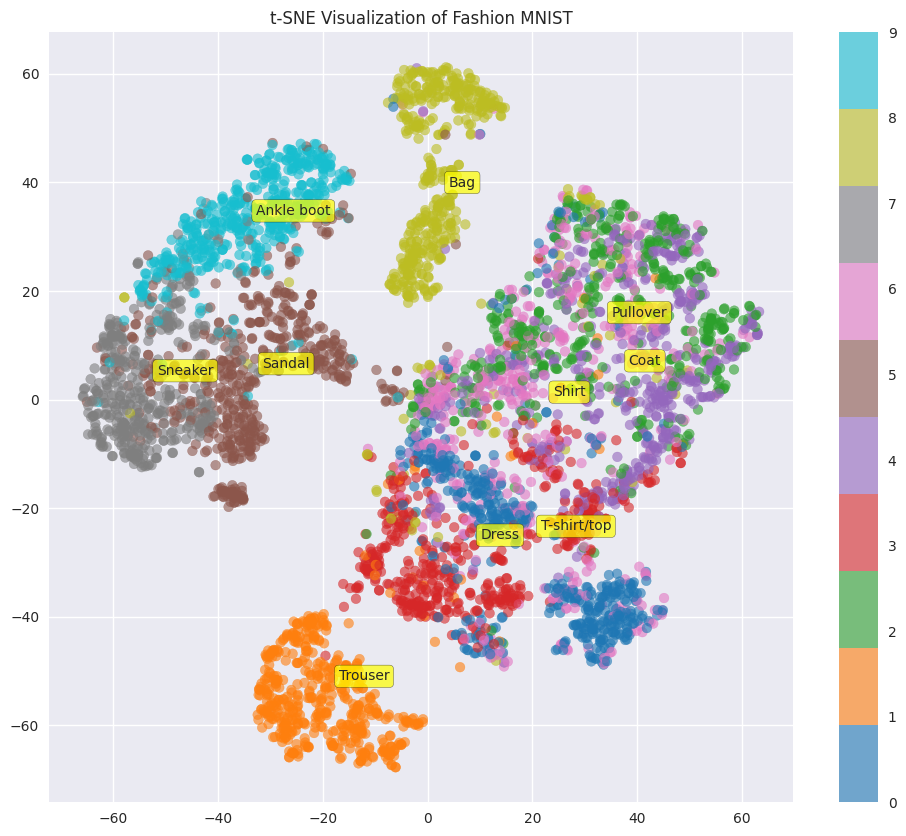


Components needed for 95% variance: 1


5. Class Relationship Analysis...
------------------------------


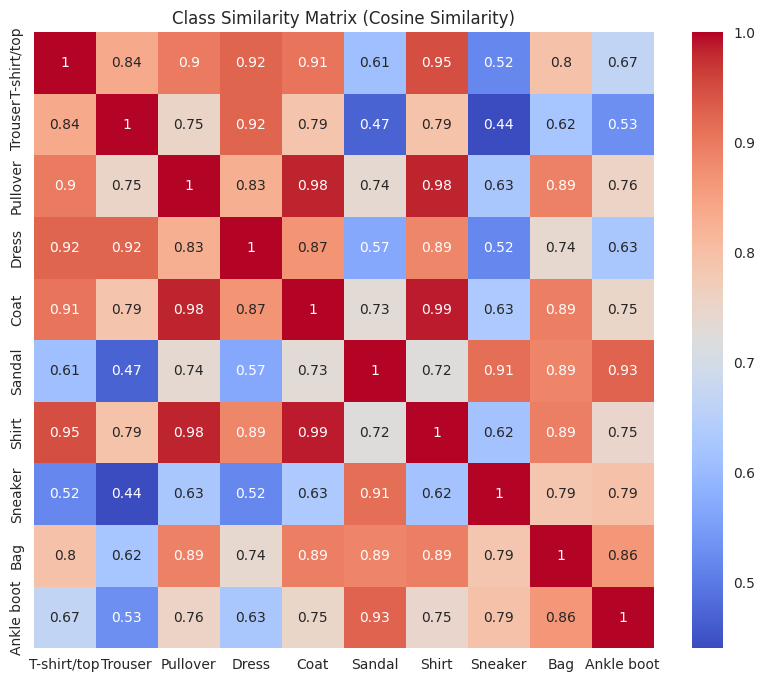


Most similar class pairs:
Coat - Shirt: 0.987
Pullover - Coat: 0.984
Pullover - Shirt: 0.983
T-shirt/top - Shirt: 0.949
Sandal - Ankle boot: 0.927

Least similar class pairs:
Trouser - Ankle boot: 0.529
T-shirt/top - Sneaker: 0.518
Dress - Sneaker: 0.517
Trouser - Sandal: 0.471
Trouser - Sneaker: 0.440


6. Data Quality Assessment...
------------------------------


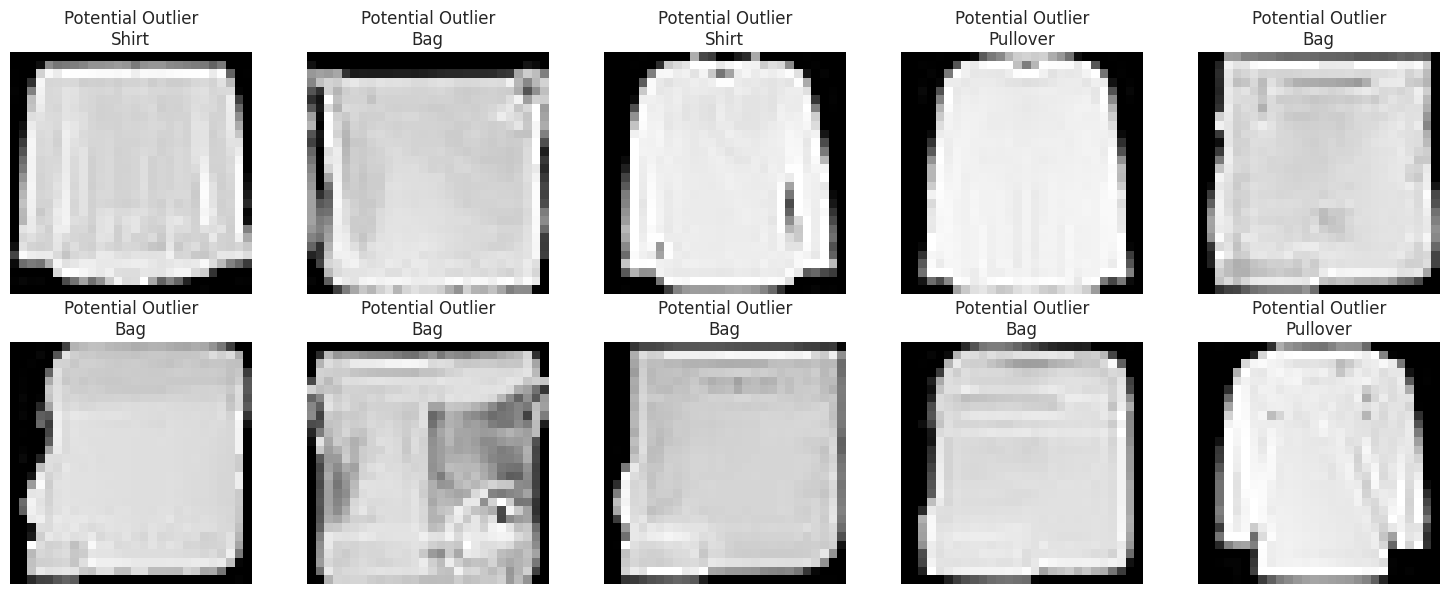


Data Quality Assessment:
Outlier count: 37
Outlier percentage: 0.06%
Data range: [0.0, 255.0]
Contains null values: False
Data type: uint8


7. Preprocessing Insights...
------------------------------


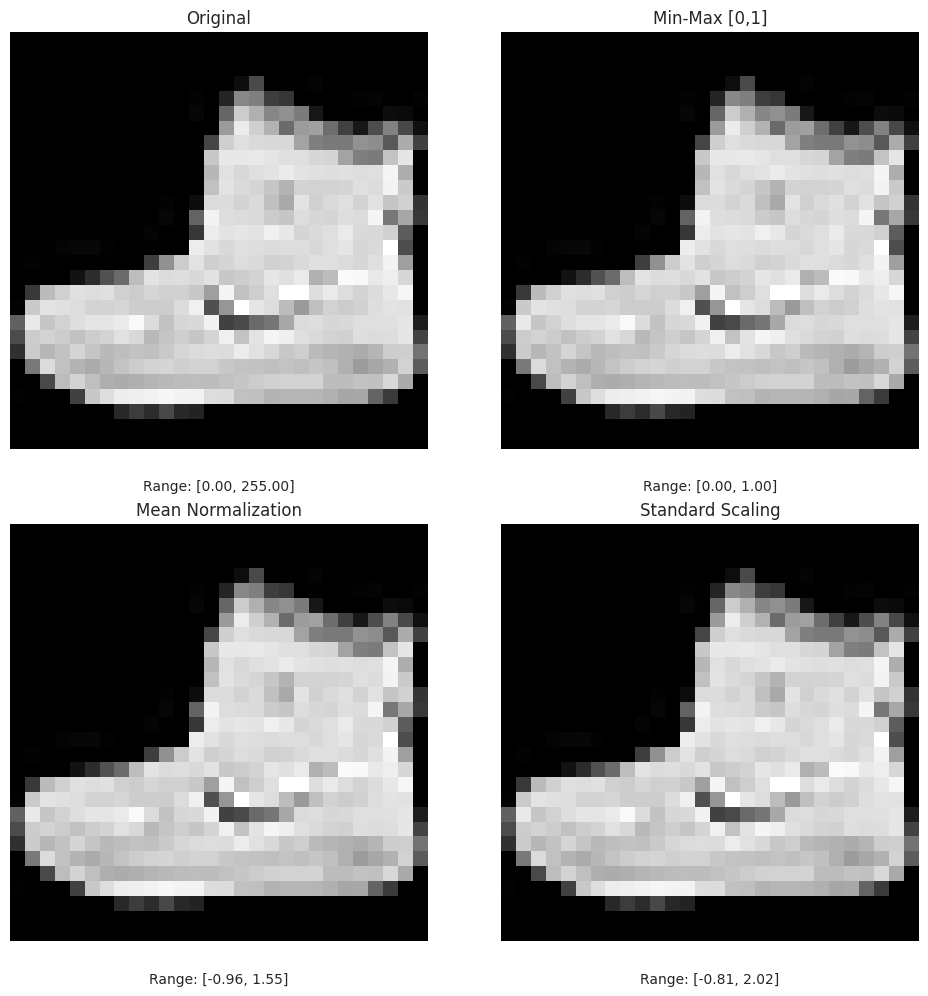

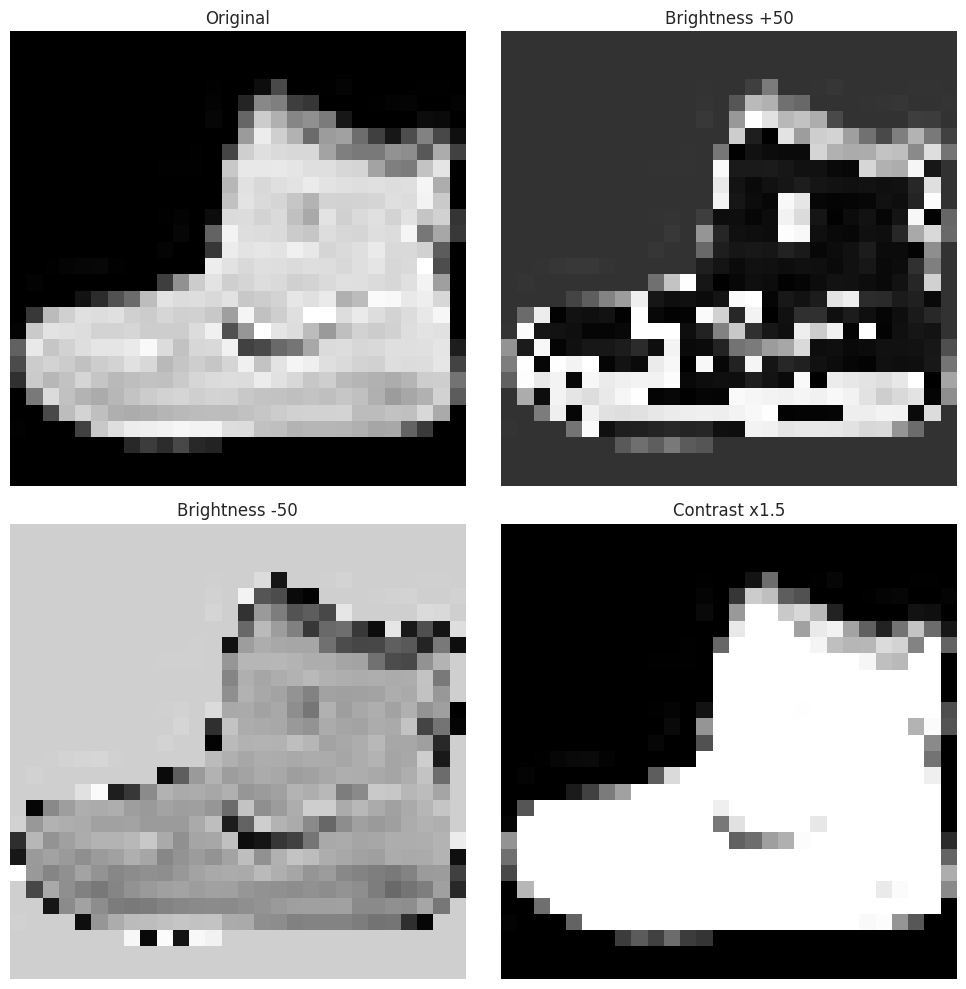


Preprocessing Recommendations:
Normalization: Min-Max [0,1]
Reason: Maintains relative pixel intensities while scaling to standard range

Suggested Augmentations:
- Random rotation (±10 degrees)
- Random horizontal flip
- Random brightness adjustment (±10%)
- Random zoom (0.9-1.1x)


8. Performance Predictions...
------------------------------


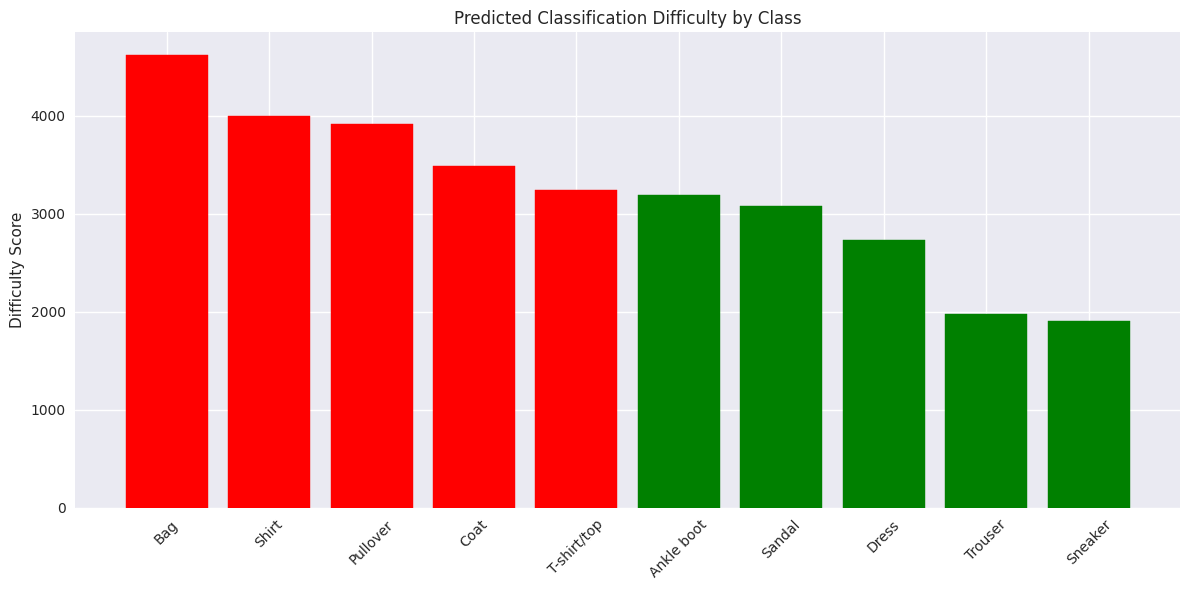


Predicted Class Difficulty (most to least difficult):
1. Bag (Difficulty Score: 4622.97)
   Most similar to: Coat (Similarity: 0.894)
2. Shirt (Difficulty Score: 3996.98)
   Most similar to: Coat (Similarity: 0.987)
3. Pullover (Difficulty Score: 3916.03)
   Most similar to: Coat (Similarity: 0.984)
4. Coat (Difficulty Score: 3488.38)
   Most similar to: Shirt (Similarity: 0.987)
5. T-shirt/top (Difficulty Score: 3242.51)
   Most similar to: Shirt (Similarity: 0.949)
6. Ankle boot (Difficulty Score: 3198.08)
   Most similar to: Sandal (Similarity: 0.927)
7. Sandal (Difficulty Score: 3077.62)
   Most similar to: Ankle boot (Similarity: 0.927)
8. Dress (Difficulty Score: 2738.02)
   Most similar to: Trouser (Similarity: 0.925)
9. Trouser (Difficulty Score: 1974.43)
   Most similar to: Dress (Similarity: 0.925)
10. Sneaker (Difficulty Score: 1908.78)
   Most similar to: Sandal (Similarity: 0.913)


9. Comparative Analysis...
------------------------------


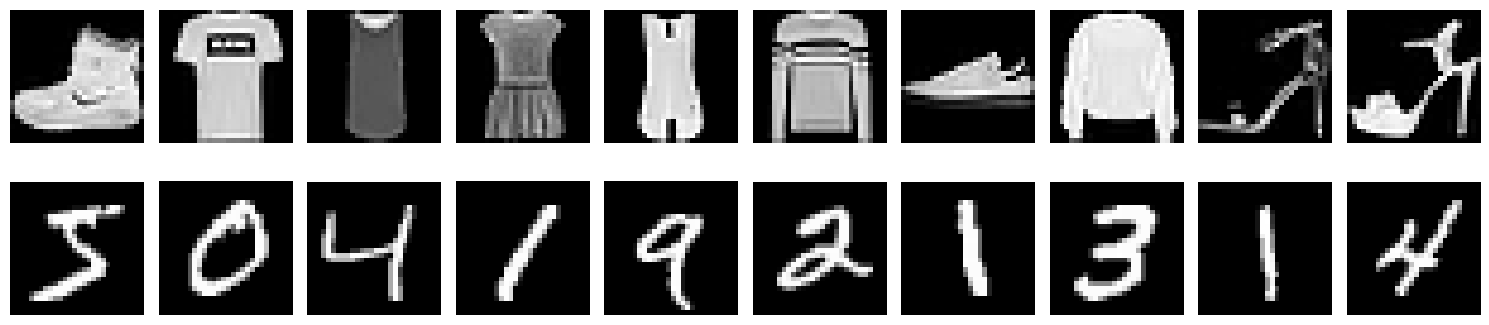

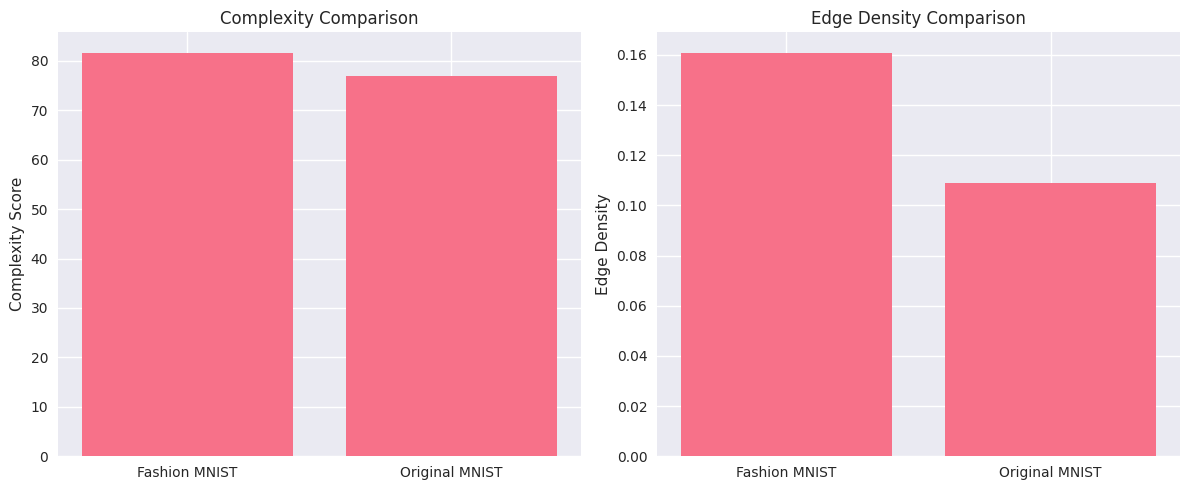


Comparative Analysis:
Fashion MNIST is 1.06x more complex
Fashion MNIST has 1.48x edge density

Key differences:
- Fashion MNIST has more complex patterns and textures
- Higher intra-class variability in Fashion MNIST
- More challenging due to visual similarity between classes
- Requires more sophisticated feature extraction


10. Generating Executive Summary...
------------------------------


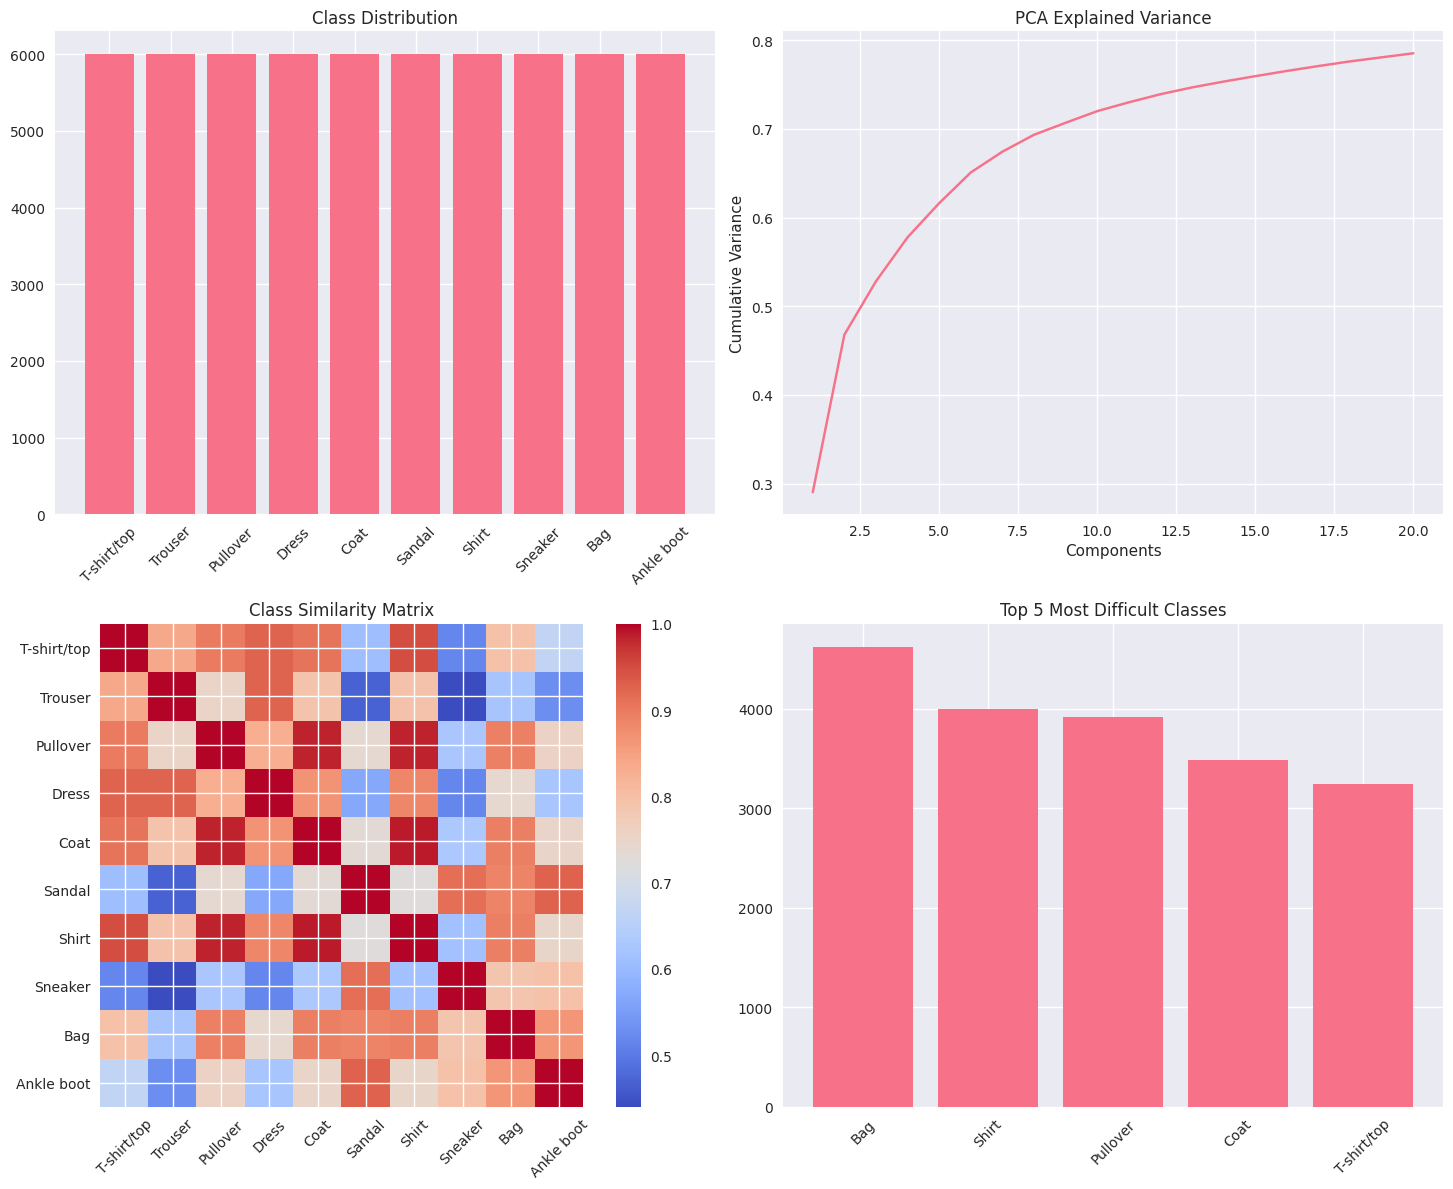


EXECUTIVE SUMMARY

Analysis Timestamp: 2025-04-27 11:05:20

Dataset Summary:
- Total samples: 70000
- Image dimensions: (28, 28)
- Number of classes: 10
- Class balance: Balanced (6,000 samples per class)

Key Findings:
- Data Quality: 0.06% potential outliers detected
- Dimensionality: 1 components explain 95% variance
- Class Relationships: Most similar classes: Coat and Shirt
- Complexity: 1.06x more complex than original MNIST

Recommendations:
- Preprocessing: Min-Max [0,1]
- Architecture: Use deeper CNNs for Fashion MNIST
- Expected Performance: 92-95%


11. Creating Dashboard Summary...
------------------------------


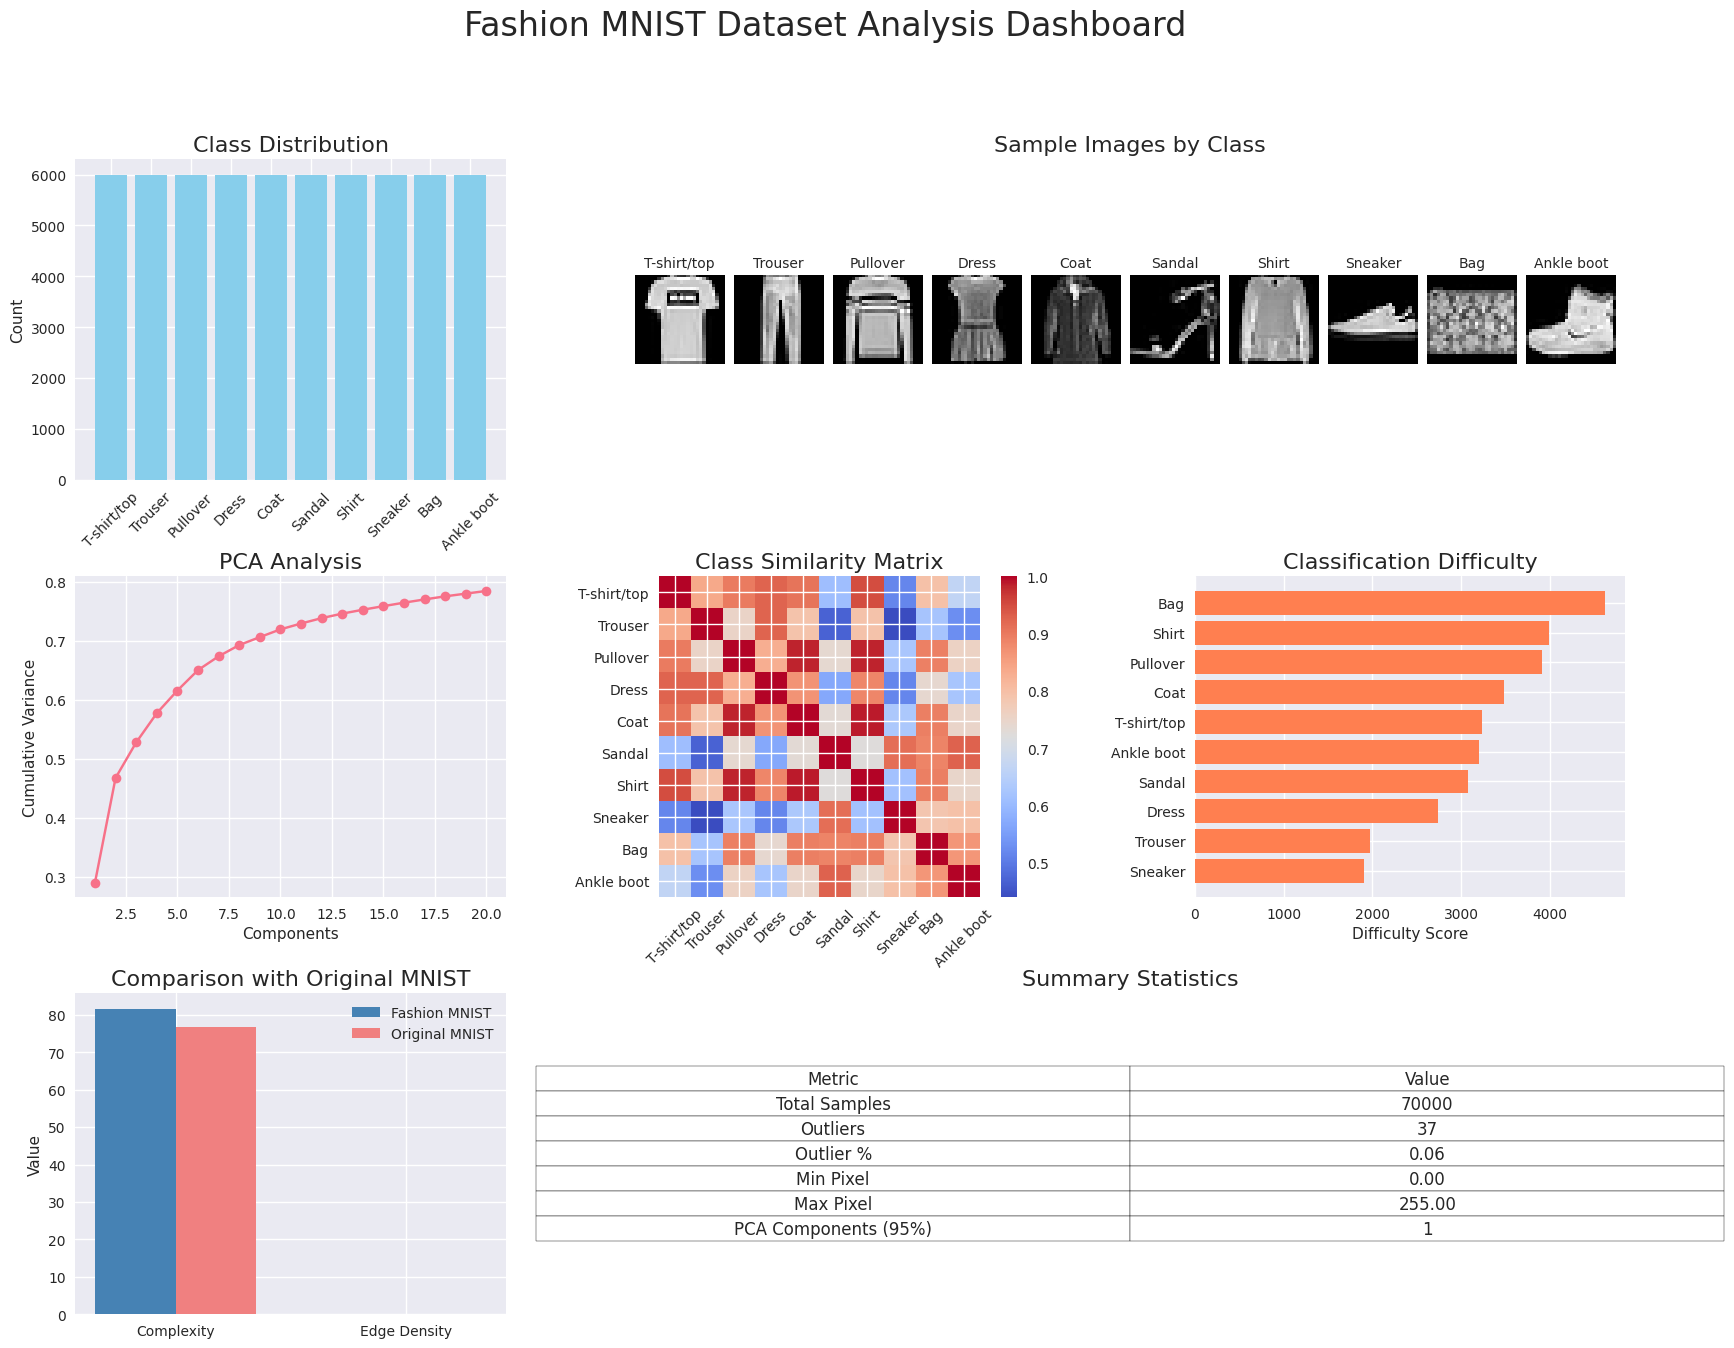


Analysis Complete! Check ./analysis_results/ for all outputs.


In [15]:
def run_complete_analysis():
    print("Starting Fashion MNIST Analysis...")
    print("="*50 + "\n")
    
    print("1. Dataset Overview...")
    print("-"*30)
    global overview_data
    overview_data = analyze_dataset_overview()
    print("\n")
    
    print("2. Statistical Analysis...")
    print("-"*30)
    global stats_data
    stats_data = statistical_analysis()
    print("\n")
    
    print("3. Visual Pattern Analysis...")
    print("-"*30)
    global average_images
    average_images = visual_pattern_analysis()
    print("\n")
    
    print("4. Dimensionality Analysis...")
    print("-"*30)
    global dim_data
    dim_data = dimensionality_analysis()
    print("\n")
    
    print("5. Class Relationship Analysis...")
    print("-"*30)
    global relationship_data
    relationship_data = class_relationship_analysis()
    print("\n")
    
    print("6. Data Quality Assessment...")
    print("-"*30)
    global quality_data
    quality_data = data_quality_assessment()
    print("\n")
    
    print("7. Preprocessing Insights...")
    print("-"*30)
    global preprocessing_data
    preprocessing_data = preprocessing_insights()
    print("\n")
    
    print("8. Performance Predictions...")
    print("-"*30)
    global performance_data
    performance_data = performance_predictions()
    print("\n")
    
    print("9. Comparative Analysis...")
    print("-"*30)
    global comparison_data
    comparison_data = comparative_analysis()
    print("\n")
    
    print("10. Generating Executive Summary...")
    print("-"*30)
    global executive_summary
    executive_summary = generate_executive_summary()
    
    print("\n11. Creating Dashboard Summary...")
    print("-"*30)
    create_dashboard_summary()
    
    print("\n" + "="*50)
    print("Analysis Complete! Check ./analysis_results/ for all outputs.")
    print("="*50)

# Run the complete analysis
if __name__ == "__main__":
    run_complete_analysis()

### **Display all JSON files as formatted tables**

In [16]:
def display_json_files():
    """Display all JSON files in the analysis_results directory as formatted tables."""
    import glob
    
    json_files = sorted(glob.glob('./analysis_results/*.json'))
    
    for json_file in json_files:
        print(f"\n{'-'*50}")
        print(f"Contents of: {os.path.basename(json_file)}")
        print(f"{'-'*50}")
        
        with open(json_file, 'r') as f:
            data = json.load(f)
        
        if isinstance(data, dict):
            # For nested dictionaries, create a flattened view
            rows = []
            for key, value in data.items():
                if isinstance(value, dict):
                    for sub_key, sub_value in value.items():
                        rows.append({
                            'Category': key,
                            'Metric': sub_key,
                            'Value': sub_value if not isinstance(sub_value, (list, dict)) else str(sub_value)[:50] + '...'
                        })
                else:
                    rows.append({
                        'Category': '',
                        'Metric': key,
                        'Value': value if not isinstance(value, (list, dict)) else str(value)[:50] + '...'
                    })
            
            df = pd.DataFrame(rows)
            display(df)
        else:
            print(data)

# Display all JSON files as formatted tables
display_json_files()


--------------------------------------------------
Contents of: 01_dataset_overview.json
--------------------------------------------------


,Category,Metric,Value
0,train_distribution,T-shirt/top,6000
1,train_distribution,Trouser,6000
2,train_distribution,Pullover,6000
3,train_distribution,Dress,6000
4,train_distribution,Coat,6000
5,train_distribution,Sandal,6000
6,train_distribution,Shirt,6000
7,train_distribution,Sneaker,6000
8,train_distribution,Bag,6000
9,train_distribution,Ankle boot,6000



--------------------------------------------------
Contents of: 02_statistical_analysis.json
--------------------------------------------------


,Category,Metric,Value
0,global_statistics,mean,72.940352
1,global_statistics,std,90.021182
2,class_statistics,T-shirt/top,"{'mean': 83.02998044217686, 'std': 89.43848028..."
3,class_statistics,Trouser,"{'mean': 56.84085522959184, 'std': 87.60026328..."
4,class_statistics,Pullover,"{'mean': 96.058762542517, 'std': 91.4634663691..."
5,class_statistics,Dress,"{'mean': 66.01890858843538, 'std': 90.32600060..."
6,class_statistics,Coat,"{'mean': 98.25800552721088, 'std': 95.95952360..."
7,class_statistics,Sandal,"{'mean': 34.86754655612245, 'std': 67.09256263..."
8,class_statistics,Shirt,"{'mean': 84.60511989795918, 'std': 86.51605067..."
9,class_statistics,Sneaker,"{'mean': 42.76207227891157, 'std': 75.17057254..."



--------------------------------------------------
Contents of: 04_dimensionality_analysis.json
--------------------------------------------------


,Category,Metric,Value
0,,pca_explained_variance_ratio,"[0.2903922792136605, 0.17755309978162206, 0.06..."
1,,pca_components_needed_95,1



--------------------------------------------------
Contents of: 05_class_relationships.json
--------------------------------------------------


,Category,Metric,Value
0,,similarity_matrix,"[[1.0000000000000004, 0.8366765717192833, 0.89..."
1,,most_similar_pairs,"[{'class1': 'Coat', 'class2': 'Shirt', 'simila..."
2,,least_similar_pairs,"[{'class1': 'Trouser', 'class2': 'Ankle boot',..."



--------------------------------------------------
Contents of: 06_data_quality_assessment.json
--------------------------------------------------


,Category,Metric,Value
0,,outlier_count,37
1,,outlier_percentage,0.061667
2,data_range,min,0.0
3,data_range,max,255.0
4,,null_values,False
5,,data_type,uint8



--------------------------------------------------
Contents of: 07_preprocessing_insights.json
--------------------------------------------------


,Category,Metric,Value
0,,recommended_normalization,"Min-Max [0,1]"
1,,reason,Maintains relative pixel intensities while sca...
2,,augmentation_suggestions,"['Random rotation (±10 degrees)', 'Random hori..."



--------------------------------------------------
Contents of: 08_performance_predictions.json
--------------------------------------------------


,Category,Metric,Value
0,,class_difficulty_ranking,"[{'class': 'Bag', 'variance': 5172.82532960208..."
1,,expected_confusion_pairs,"[{'pair': ['Bag', 'Coat'], 'similarity': 0.893..."
2,estimated_accuracy_range,simple_model,85-90%
3,estimated_accuracy_range,complex_model,92-95%
4,estimated_accuracy_range,ensemble,94-97%



--------------------------------------------------
Contents of: 09_comparative_analysis.json
--------------------------------------------------


,Category,Metric,Value
0,complexity_comparison,fashion_mnist,81.663476
1,complexity_comparison,original_mnist,76.834539
2,complexity_comparison,complexity_ratio,1.062849
3,edge_density_comparison,fashion_mnist,0.160958
4,edge_density_comparison,original_mnist,0.108818
5,edge_density_comparison,edge_ratio,1.479153
6,,key_differences,['Fashion MNIST has more complex patterns and ...
7,,architecture_recommendations,"['Use deeper CNNs for Fashion MNIST', 'Conside..."



--------------------------------------------------
Contents of: 10_executive_summary.json
--------------------------------------------------


,Category,Metric,Value
0,,analysis_timestamp,2025-04-27 11:05:20
1,dataset_summary,total_samples,70000
2,dataset_summary,image_dimensions,"[28, 28]..."
3,dataset_summary,number_of_classes,10
4,dataset_summary,class_balance,"Balanced (6,000 samples per class)"
5,key_findings,data_quality,0.06% potential outliers detected
6,key_findings,dimensionality,1 components explain 95% variance
7,key_findings,class_relationships,Most similar classes: Coat and Shirt
8,key_findings,complexity,1.06x more complex than original MNIST
9,recommendations,preprocessing,"Min-Max [0,1]"


### **Create a summary of all generated files**

In [17]:
def create_file_summary():
    """Create a summary of all generated files."""
    import glob
    
    all_files = sorted(glob.glob('./analysis_results/*'))
    
    file_summary = pd.DataFrame({
        'Filename': [os.path.basename(f) for f in all_files],
        'Type': [os.path.splitext(f)[1][1:].upper() for f in all_files],
        'Size (KB)': [os.path.getsize(f) / 1024 for f in all_files]
    })
    
    file_summary['Size (KB)'] = file_summary['Size (KB)'].round(2)
    
    print("\n" + "="*50)
    print("GENERATED FILES SUMMARY")
    print("="*50)
    display(file_summary)
    
    # Save the file summary
    file_summary.to_csv('./analysis_results/00_file_summary.csv', index=False)
    
    return file_summary

# Create and display file summary
file_summary = create_file_summary()


GENERATED FILES SUMMARY


,Filename,Type,Size (KB)
0,01_class_distribution.png,PNG,175.21
1,01_dataset_overview.json,JSON,0.66
2,02_class_brightness_distribution.png,PNG,218.85
3,02_pixel_intensity_distribution.png,PNG,64.75
4,02_statistical_analysis.json,JSON,1.94
5,03_average_class_images.png,PNG,99.74
6,03_class_samples.png,PNG,250.63
7,03_edge_detection_analysis.png,PNG,71.16
8,04_dimensionality_analysis.json,JSON,1.55
9,04_pca_explained_variance.png,PNG,121.63


***
***